# **Project Name**    -



##### **Project Type**    - Classification
##### **Contribution**    - Individual
##### **Name -** Aman Mulla

# **Project Summary -**

#### **Let's Begin!!**

**The give dataset which is 'Credit Card Default Prediction' gives data of customer and their credit card transactions. Dataset contain transaction like repayment of 6 months,Bill amount of 6 months, Amount of previous payments of 6 months.We will understand what 'Defaulter' actually known for.**

**A credit card defaulter is an individual or entity that fails to make the minimum required payments on their credit card account as specified in the terms and conditions set by the credit card issuer/bank.In simple words, when a person doesn't make at least the minimum payment on their credit card balance by the due date, they are considered a credit card defaulter.**

**It's important to make at least the minimum payment on your credit card by the due date to avoid these negative consequences.**

**Along with, transaction details we have variables like age, sex, education, Marriage Status,Limit Balance.** **Details of every variable given as,**

1.   **ID**: A unique identifier for each client.
2.   **LIMIT_BAL**: The amount of credit granted to the client.
3.   **SEX**: Gender of the client (1 = male, 2 = female).
4.   **EDUCATION**: Level of education (1 = graduate school, 2 = university, 3 = high school, 4 = others, 5 = unknown, 6 = unknown).
5.   **MARRIAGE**: Marital status (1 = married, 2 = single, 3 = others).
6.   **AGE**: Age of the client in years.
7.   **PAY_0, PAY_2, PAY_3, PAY_4, PAY_5, PAY_6**: Repayment status in the previous six months, with values indicating the level of payment delay.
8.   **BILL_AMT1, BILL_AMT2, BILL_AMT3, BILL_AMT4, BILL_AMT5, BILL_AMT6**: Amount of the bill statement for the respective months.
9.   **PAY_AMT1, PAY_AMT2, PAY_AMT3, PAY_AMT4, PAY_AMT5, PAY_AMT6**: Amount of the previous payment for the respective months.
10.   **default.payment.next.month**: A variable indicating whether the client defaulted on their payment in the next month (1 = yes, 0 = no).

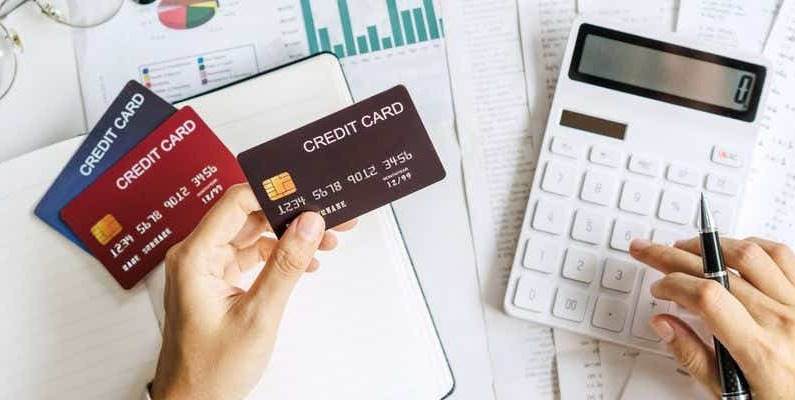

# **GitHub Link -**

https://github.com/mramanmulla/MachineLearningModels/blob/9b2017504a8fe5e7fb860797ff710ddad793c7a7/README.md

# **Problem Statement**


By understanding dataset, problem statement mentioned as below,

***To develop a Machine learning model to predict the risk of credit card defaulter from clints by taking insights from historical data provided such as repayment status, bill amount and payment amount. Also to create model to predict accuratly which type of clint are at risk of defaulting on their credit card payments.***

# ***Let's Begin !***

## ***1. Know Your Data***

### Import Libraries

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

pd.set_option('display.max_rows', None)

import warnings
warnings.filterwarnings("ignore")

# All other Necessary librabies will be importing at the time of code execution.

### Dataset Loading

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
creditcard_data = pd.read_excel('/content/drive/MyDrive/DataSets/default of credit card clients (1).xls',skiprows=1)

creditcard_data.head()

ID  LIMIT_BAL  SEX  EDUCATION  MARRIAGE  AGE  PAY_0  PAY_2  PAY_3  PAY_4  \
0   1      20000    2          2         1   24      2      2     -1     -1   
1   2     120000    2          2         2   26     -1      2      0      0   
2   3      90000    2          2         2   34      0      0      0      0   
3   4      50000    2          2         1   37      0      0      0      0   
4   5      50000    1          2         1   57     -1      0     -1      0   

   ...  BILL_AMT4  BILL_AMT5  BILL_AMT6  PAY_AMT1  PAY_AMT2  PAY_AMT3  \
0  ...          0          0          0         0       689         0   
1  ...       3272       3455       3261         0      1000      1000   
2  ...      14331      14948      15549      1518      1500      1000   
3  ...      28314      28959      29547      2000      2019      1200   
4  ...      20940      19146      19131      2000     36681     10000   

   PAY_AMT4  PAY_AMT5  PAY_AMT6  default payment next month  
0         0         0         0                           1  
1      1000         0      2000                           1  
2      1000      1000      5000                           0  
3      1100      1069      1000                           0  
4      9000       689       679                           0  

[5 rows x 25 columns]

In [4]:
creditcard_data.head(20)

ID  LIMIT_BAL  SEX  EDUCATION  MARRIAGE  AGE  PAY_0  PAY_2  PAY_3  PAY_4  \
0    1      20000    2          2         1   24      2      2     -1     -1   
1    2     120000    2          2         2   26     -1      2      0      0   
2    3      90000    2          2         2   34      0      0      0      0   
3    4      50000    2          2         1   37      0      0      0      0   
4    5      50000    1          2         1   57     -1      0     -1      0   
5    6      50000    1          1         2   37      0      0      0      0   
6    7     500000    1          1         2   29      0      0      0      0   
7    8     100000    2          2         2   23      0     -1     -1      0   
8    9     140000    2          3         1   28      0      0      2      0   
9   10      20000    1          3         2   35     -2     -2     -2     -2   
10  11     200000    2          3         2   34      0      0      2      0   
11  12     260000    2          1         2   51     -1     -1     -1     -1   
12  13     630000    2          2         2   41     -1      0     -1     -1   
13  14      70000    1          2         2   30      1      2      2      0   
14  15     250000    1          1         2   29      0      0      0      0   
15  16      50000    2          3         3   23      1      2      0      0   
16  17      20000    1          1         2   24      0      0      2      2   
17  18     320000    1          1         1   49      0      0      0     -1   
18  19     360000    2          1         1   49      1     -2     -2     -2   
19  20     180000    2          1         2   29      1     -2     -2     -2   

    ...  BILL_AMT4  BILL_AMT5  BILL_AMT6  PAY_AMT1  PAY_AMT2  PAY_AMT3  \
0   ...          0          0          0         0       689         0   
1   ...       3272       3455       3261         0      1000      1000   
2   ...      14331      14948      15549      1518      1500      1000   
3   ...      28314      28959      29547      2000      2019      1200   
4   ...      20940      19146      19131      2000     36681     10000   
5   ...      19394      19619      20024      2500      1815       657   
6   ...     542653     483003     473944     55000     40000     38000   
7   ...        221       -159        567       380       601         0   
8   ...      12211      11793       3719      3329         0       432   
9   ...          0      13007      13912         0         0         0   
10  ...       2513       1828       3731      2306        12        50   
11  ...       8517      22287      13668     21818      9966      8583   
12  ...       6500       6500       2870      1000      6500      6500   
13  ...      66782      36137      36894      3200         0      3000   
14  ...      59696      56875      55512      3000      3000      3000   
15  ...      28771      29531      30211         0      1500      1100   
16  ...      18338      17905      19104      3200         0      1500   
17  ...      70074       5856     195599     10358     10000     75940   
18  ...          0          0          0         0         0         0   
19  ...          0          0          0         0         0         0   

    PAY_AMT4  PAY_AMT5  PAY_AMT6  default payment next month  
0          0         0         0                           1  
1       1000         0      2000                           1  
2       1000      1000      5000                           0  
3       1100      1069      1000                           0  
4       9000       689       679                           0  
5       1000      1000       800                           0  
6      20239     13750     13770                           0  
7        581      1687      1542                           0  
8       1000      1000      1000                           0  
9      13007      1122         0                           0  
10       300      3738        66                           0  
11     22301

**To avoid type error will remane for some of column names,**

In [5]:
creditcard_data.rename(columns={'default payment next month': 'default_payment_next_month'}, inplace=True)

### Dataset First View

In [6]:
creditcard_data.head()

ID  LIMIT_BAL  SEX  EDUCATION  MARRIAGE  AGE  PAY_0  PAY_2  PAY_3  PAY_4  \
0   1      20000    2          2         1   24      2      2     -1     -1   
1   2     120000    2          2         2   26     -1      2      0      0   
2   3      90000    2          2         2   34      0      0      0      0   
3   4      50000    2          2         1   37      0      0      0      0   
4   5      50000    1          2         1   57     -1      0     -1      0   

   ...  BILL_AMT4  BILL_AMT5  BILL_AMT6  PAY_AMT1  PAY_AMT2  PAY_AMT3  \
0  ...          0          0          0         0       689         0   
1  ...       3272       3455       3261         0      1000      1000   
2  ...      14331      14948      15549      1518      1500      1000   
3  ...      28314      28959      29547      2000      2019      1200   
4  ...      20940      19146      19131      2000     36681     10000   

   PAY_AMT4  PAY_AMT5  PAY_AMT6  default_payment_next_month  
0         0         0         0                           1  
1      1000         0      2000                           1  
2      1000      1000      5000                           0  
3      1100      1069      1000                           0  
4      9000       689       679                           0  

[5 rows x 25 columns]

### Dataset Rows & Columns count

In [7]:
# Dataset Rows & Columns count

creditcard_data.shape

(30000, 25)

**There were 30000 records and 25 attributes in the dataset.**

### Dataset Information

In [8]:
# Dataset Info

creditcard_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30000 entries, 0 to 29999
Data columns (total 25 columns):
 #   Column                      Non-Null Count  Dtype
---  ------                      --------------  -----
 0   ID                          30000 non-null  int64
 1   LIMIT_BAL                   30000 non-null  int64
 2   SEX                         30000 non-null  int64
 3   EDUCATION                   30000 non-null  int64
 4   MARRIAGE                    30000 non-null  int64
 5   AGE                         30000 non-null  int64
 6   PAY_0                       30000 non-null  int64
 7   PAY_2                       30000 non-null  int64
 8   PAY_3                       30000 non-null  int64
 9   PAY_4                       30000 non-null  int64
 10  PAY_5                       30000 non-null  int64
 11  PAY_6                       30000 non-null  int64
 12  BILL_AMT1                   30000 non-null  int64
 13  BILL_AMT2                   30000 non-null  int64
 14  BILL_A

**So, from .info() only one type of datatype we have that is int64.**

#### Duplicate Values

In [9]:
# Dataset Duplicate Value Count

creditcard_data[creditcard_data.duplicated()]

Empty DataFrame
Columns: [ID, LIMIT_BAL, SEX, EDUCATION, MARRIAGE, AGE, PAY_0, PAY_2, PAY_3, PAY_4, PAY_5, PAY_6, BILL_AMT1, BILL_AMT2, BILL_AMT3, BILL_AMT4, BILL_AMT5, BILL_AMT6, PAY_AMT1, PAY_AMT2, PAY_AMT3, PAY_AMT4, PAY_AMT5, PAY_AMT6, default_payment_next_month]
Index: []

[0 rows x 25 columns]

No any duplicate entry found in dataset.

#### Missing Values/Null Values

In [10]:
# Missing Values/Null Values Count

creditcard_data.isna().sum()

ID                            0
LIMIT_BAL                     0
SEX                           0
EDUCATION                     0
MARRIAGE                      0
AGE                           0
PAY_0                         0
PAY_2                         0
PAY_3                         0
PAY_4                         0
PAY_5                         0
PAY_6                         0
BILL_AMT1                     0
BILL_AMT2                     0
BILL_AMT3                     0
BILL_AMT4                     0
BILL_AMT5                     0
BILL_AMT6                     0
PAY_AMT1                      0
PAY_AMT2                      0
PAY_AMT3                      0
PAY_AMT4                      0
PAY_AMT5                      0
PAY_AMT6                      0
default_payment_next_month    0
dtype: int64

**There were no any null or missing value found in dataset.**

<Axes: >

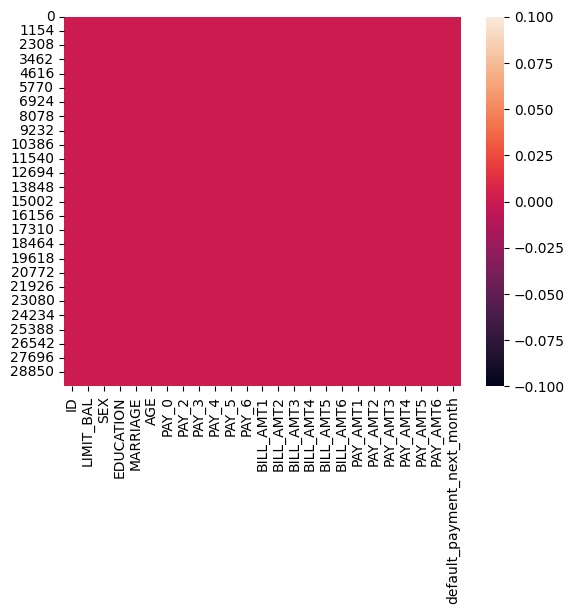

In [11]:
# Null value visulization

sns.heatmap(creditcard_data.isnull())

## ***2. Understanding Your Variables***

In [12]:
# Dataset Columns

creditcard_data.columns

Index(['ID', 'LIMIT_BAL', 'SEX', 'EDUCATION', 'MARRIAGE', 'AGE', 'PAY_0',
       'PAY_2', 'PAY_3', 'PAY_4', 'PAY_5', 'PAY_6', 'BILL_AMT1', 'BILL_AMT2',
       'BILL_AMT3', 'BILL_AMT4', 'BILL_AMT5', 'BILL_AMT6', 'PAY_AMT1',
       'PAY_AMT2', 'PAY_AMT3', 'PAY_AMT4', 'PAY_AMT5', 'PAY_AMT6',
       'default_payment_next_month'],
      dtype='object')

In [13]:
# Dataset Describe

creditcard_data.describe()

ID       LIMIT_BAL           SEX     EDUCATION      MARRIAGE  \
count  30000.000000    30000.000000  30000.000000  30000.000000  30000.000000   
mean   15000.500000   167484.322667      1.603733      1.853133      1.551867   
std     8660.398374   129747.661567      0.489129      0.790349      0.521970   
min        1.000000    10000.000000      1.000000      0.000000      0.000000   
25%     7500.750000    50000.000000      1.000000      1.000000      1.000000   
50%    15000.500000   140000.000000      2.000000      2.000000      2.000000   
75%    22500.250000   240000.000000      2.000000      2.000000      2.000000   
max    30000.000000  1000000.000000      2.000000      6.000000      3.000000   

                AGE         PAY_0         PAY_2         PAY_3         PAY_4  \
count  30000.000000  30000.000000  30000.000000  30000.000000  30000.000000   
mean      35.485500     -0.016700     -0.133767     -0.166200     -0.220667   
std        9.217904      1.123802      1.197186      1.196868      1.169139   
min       21.000000     -2.000000     -2.000000     -2.000000     -2.000000   
25%       28.000000     -1.000000     -1.000000     -1.000000     -1.000000   
50%       34.000000      0.000000      0.000000      0.000000      0.000000   
75%       41.000000      0.000000      0.000000      0.000000      0.000000   
max       79.000000      8.000000      8.000000      8.000000      8.000000   

       ...      BILL_AMT4      BILL_AMT5      BILL_AMT6       PAY_AMT1  \
count  ...   30000.000000   30000.000000   30000.000000   30000.000000   
mean   ...   43262.948967   40311.400967   38871.760400    5663.580500   
std    ...   64332.856134   60797.155770   59554.107537   16563.280354   
min    ... -170000.000000  -81334.000000 -339603.000000       0.000000   
25%    ...    2326.750000    1763.000000    1256.000000    1000.000000   
50%    ...   19052.000000   18104.500000   17071.000000    2100.000000   
75%    ...   54506.000000   50190.500000   49198.250000    5006.000000   
max    ...  891586.000000  927171.000000  961664.000000  873552.000000   

           PAY_AMT2      PAY_AMT3       PAY_AMT4       PAY_AMT5  \
count  3.000000e+04   30000.00000   30000.000000   30000.000000   
mean   5.921163e+03    5225.68150    4826.076867    4799.387633   
std    2.304087e+04   17606.96147   15666.159744   15278.305679   
min    0.000000e+00       0.00000       0.000000       0.000000   
25%    8.330000e+02     390.00000     296.000000     252.500000   
50%    2.009000e+03    1800.00000    1500.000000    1500.000000   
75%    5.000000e+03    4505.00000    4013.250000    4031.500000   
max    1.684259e+06  896040.00000  621000.000000  426529.000000   

            PAY_AMT6  default_payment_next_month  
count   30000.000000                30000.000000  
mean     5215.502567                    0.221200  
std     17777.465775                    0.415062  
min         0.000000                    0.000000  
25%       117.750000                    0.000000  
50%      1500.000000                    0.000000  
75%      4000.000000                    0.000000  
max    528666.000000                    1.000000  

[8 rows x 25 columns]

**This will give us all information about all numerical columns. Insights for this are as below**


1.   Average credit card limit for users is 167484.
2.   As Max of sex is 2 that is we have more female users of credit card rather than male.
3.   We have max of default payment of next month is 1 that is Yes, so it indicated that most of users are found as defaulter.
4.   Along with same we have details of remaining columns.

### Check Unique Values for each variable.

In [14]:
# Check Unique Values for categorical variables


creditcard_data['SEX'].unique()

creditcard_data['EDUCATION'].unique()

creditcard_data['MARRIAGE'].unique()

creditcard_data['AGE'].unique()

creditcard_data['default_payment_next_month'].unique()


array([1, 0])

In [15]:
# For checking uniqe value count for each variable
columns_to_print = ["SEX", "EDUCATION", "MARRIAGE", "AGE", "default_payment_next_month"]

for column_name in columns_to_print:
    print(creditcard_data[column_name].value_counts())
    print("\n")

2    18112
1    11888
Name: SEX, dtype: int64


2    14030
1    10585
3     4917
5      280
4      123
6       51
0       14
Name: EDUCATION, dtype: int64


2    15964
1    13659
3      323
0       54
Name: MARRIAGE, dtype: int64


29    1605
27    1477
28    1409
30    1395
26    1256
31    1217
25    1186
34    1162
32    1158
33    1146
24    1127
35    1113
36    1108
37    1041
39     954
38     944
23     931
40     870
41     824
42     794
44     700
43     670
45     617
46     570
22     560
47     501
48     466
49     452
50     411
51     340
53     325
52     304
54     247
55     209
56     178
58     122
57     122
59      83
60      67
21      67
61      56
62      44
63      31
64      31
66      25
65      24
67      16
69      15
70      10
68       5
73       4
72       3
75       3
71       3
79       1
74       1
Name: AGE, dtype: int64


0    23364
1     6636
Name: default_payment_next_month, dtype: int64




## 3. ***Data Wrangling***

### What all manipulations have you done and insights you found?

1.   We commenced by importing the dataset and the essential libraries, then carried out exploratory data analysis (EDA).
2.   We understood each variable and its unique values.
3.   We handled any Nulls or NaNs,Adjusted data types as needed.
4.   Data was transformed to ensure its compatibility with machine learning models

## ***4. Data Vizualization, Storytelling & Experimenting with charts : Understand the relationships between variables***

#### Chart - 1

### **Sex wise credit card users**

SEX
1    11888
2    18112
Name: ID, dtype: int64


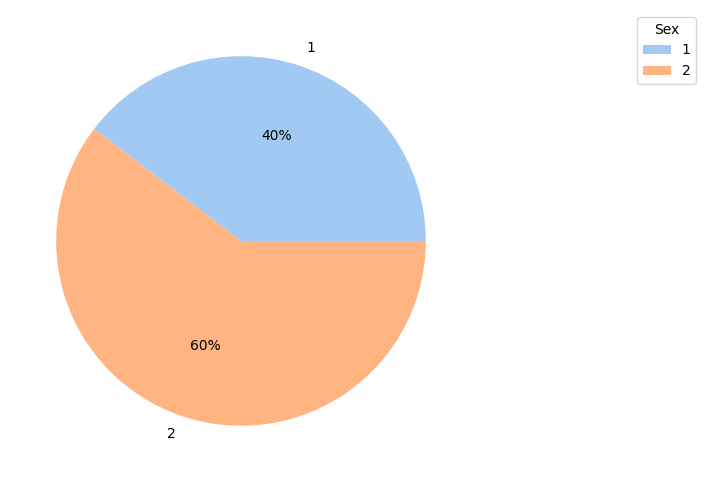

In [16]:
sex_wise_count = creditcard_data.groupby('SEX')['ID'].count()    # Gender of the client (1 = male, 2 = female)

print(sex_wise_count)

labels = sex_wise_count.index

plt.figure(figsize=(8,6))
sns.set_palette('pastel')
plt.pie(sex_wise_count,labels=sex_wise_count.index,autopct='%.0f%%')
plt.legend(labels, title="Sex", loc="upper right", bbox_to_anchor=(1, 0, 0.5, 1))
plt.show()

##### 1. Why did you pick the specific chart?

**The specific chart chosen in this code is a pie chart, and it was selected as based on the nature of the data and the information that needed to be conveyed.**
*   Pie charts are excellent for showing the distribution of a whole into its parts.
*    Pie charts work well when you have a small number of categories or parts to represent.

##### 2. What is/are the insight(s) found from the chart?

**Insighs from chart as below:-**


*   From pie chat we can observe that 60% of credit card users are Female while 40% of users are Male.



##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

**Positive Business Impact:**

*   Marketing Target : Identify for for which category/sex is market falling, understand the trend and draw future objective to get better trend.
*   Missed Opportunities: Focusing solely on gender-based insights may lead to missed opportunities. There are various other factors and demographics that influence consumer behavior, and concentrating only on gender might neglect important variables.



#### Chart - 2

EDUCATION
0       14
1    10585
2    14030
3     4917
4      123
5      280
6       51
Name: ID, dtype: int64


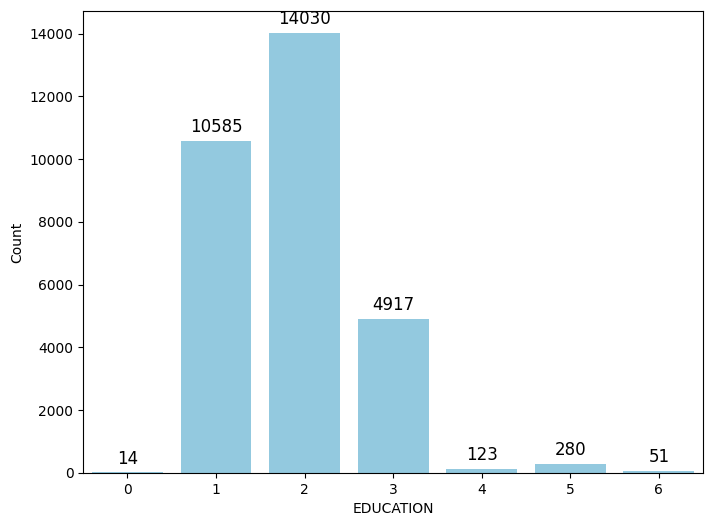

In [17]:
education_wise_count = creditcard_data.groupby('EDUCATION')['ID'].count()
print(education_wise_count)

plt.figure(figsize=(8, 6))      # 0-Unknown;1-PostGraduate;2-Graduate;3-University;4-High-school;5-PHDHolder;6-Unknown
sns.set_palette('pastel')

ax = sns.barplot(x=education_wise_count.index, y=education_wise_count, color="skyblue")

plt.xlabel("EDUCATION")
plt.ylabel("Count")

for p in ax.patches:
    ax.annotate(f'{int(p.get_height())}', (p.get_x() + p.get_width() / 2., p.get_height()), ha='center', va='center', fontsize=12, color='black', xytext=(0, 10), textcoords='offset points')

plt.show()

##### 1. Why did you pick the specific chart?

**Bar plot to visualize the year-wise rented bike count. The choice of a bar plot is determined by the requirements of the data and the type of information you want to convey.**

*   Bar plots are effective for comparing the values of different categories or groups, making it easy to see which years had higher or lower bike counts.
*   A bar chart is a suitable choice when you want to visualize the distribution of a categorical variable and compare the counts of each category.

##### 2. What is/are the insight(s) found from the chart?

**Insights are as follow,**
*   The most common education level among credit card holders in the dataset is 'Graduate.'
*    The dataset contains a variety of education levels, including 'Postgraduate,' 'Graduate,' 'University,' 'High School,' 'PHD Holder,' and an 'Unknown' category.
*    'Postgraduate' and 'Graduate' education levels are also relatively common, suggesting that a considerable portion of credit card holders in the dataset have pursued higher education.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

*   Customer Dividation: Understanding of different education levels allows the business to segment its customer base more effectively. This can lead to the development of targeted marketing strategies
*   Customized Products development: With knowledge about the education levels of customers,  they can offer educational loans or investment products that align with the educational backgrounds of customers.
*   By Understanding the diversity of education levels, the business can engage with customers on a more personal and relevant level.





#### Chart - 3

#### Visualization of the Relationship Between Bill Amount and Payment Amount

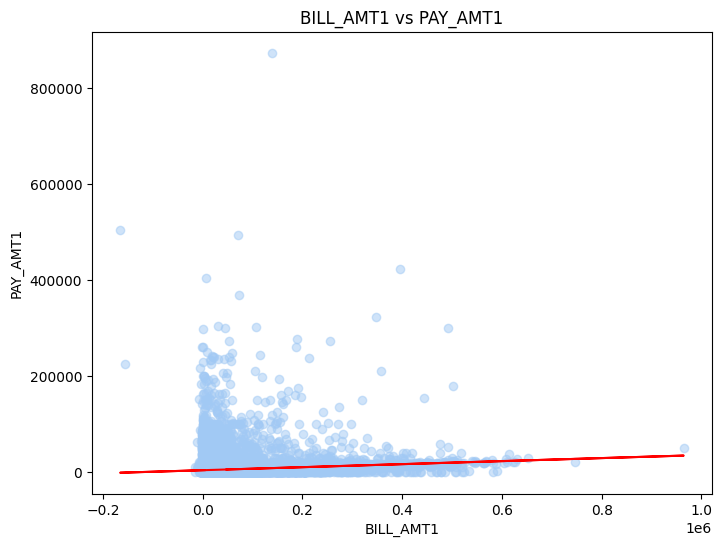

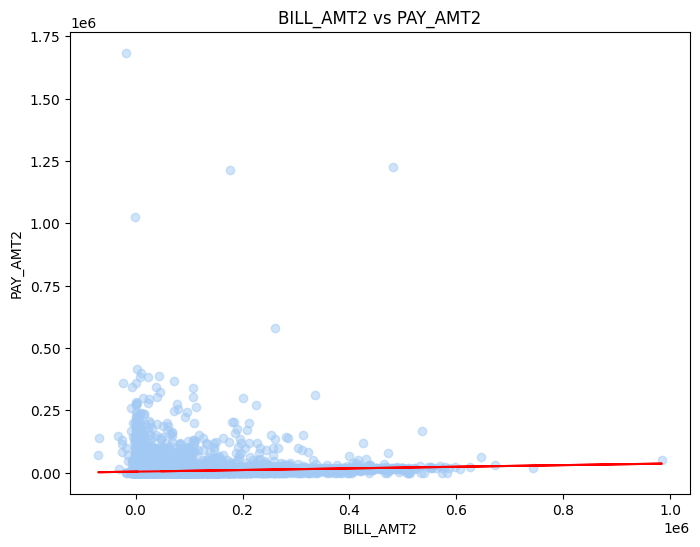

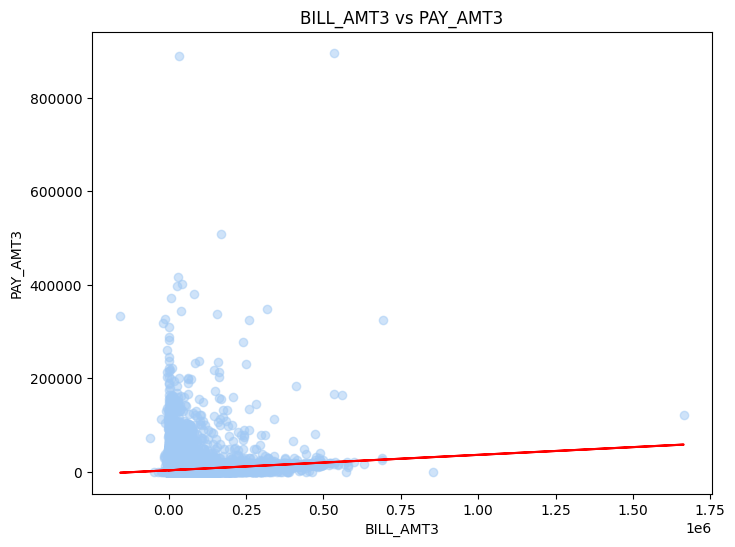

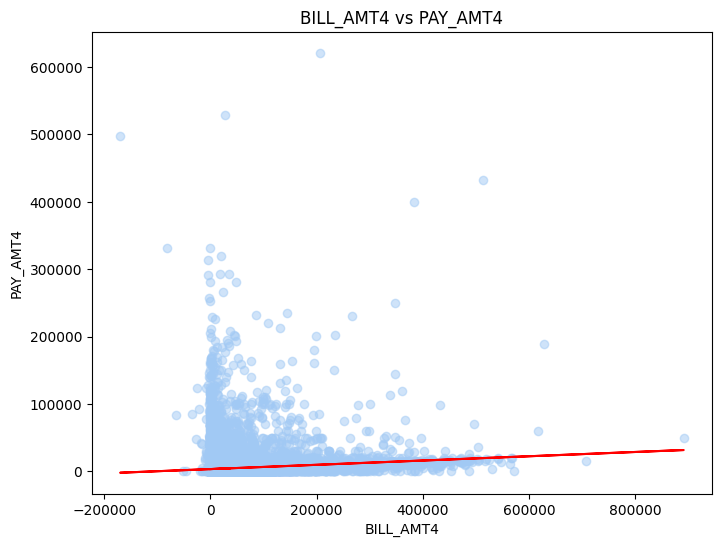

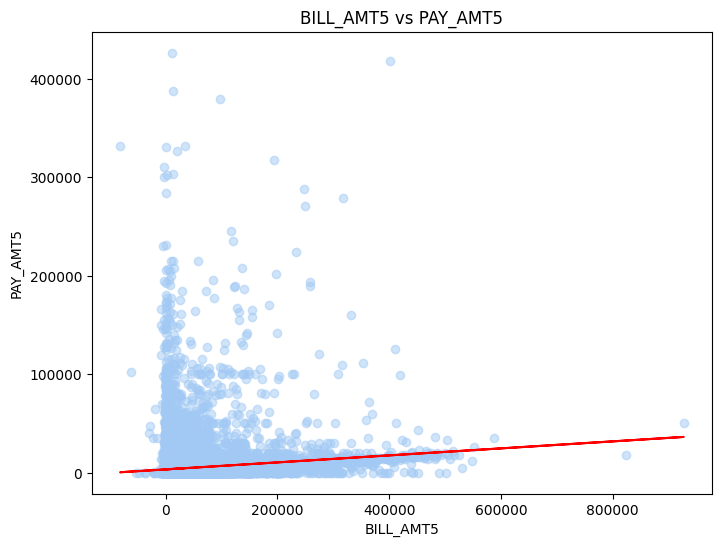

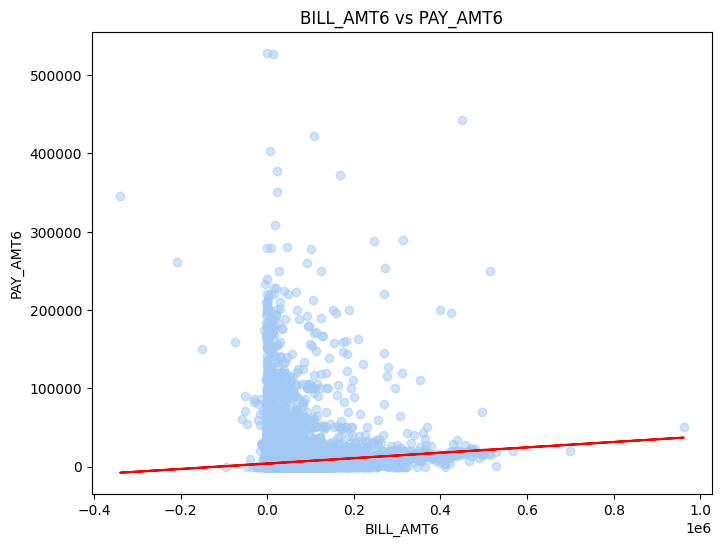

In [18]:
bill_columns = ['BILL_AMT1', 'BILL_AMT2', 'BILL_AMT3', 'BILL_AMT4', 'BILL_AMT5', 'BILL_AMT6']
pay_columns = ['PAY_AMT1', 'PAY_AMT2', 'PAY_AMT3', 'PAY_AMT4', 'PAY_AMT5', 'PAY_AMT6']

for bill_col, pay_col in zip(bill_columns, pay_columns):
    plt.figure(figsize=(8, 6))
    plt.scatter(creditcard_data[bill_col], creditcard_data[pay_col], alpha=0.5)
    z = np.polyfit(creditcard_data[bill_col], creditcard_data[pay_col], 1)
    p = np.poly1d(z)
    plt.plot(creditcard_data[bill_col], p(creditcard_data[bill_col]), "r-")
    plt.title(f'{bill_col} vs {pay_col}')
    plt.xlabel(bill_col)
    plt.ylabel(pay_col)
    plt.show()


##### 1. Why did you pick the specific chart?

**Bar plot to visualize the year-wise rented bike count. The choice of a bar plot is determined by the requirements of the data and the type of information you want to convey.**

*   Scatter plots allow you to visually assess the relationship between two variables.
*   Scatter plots can quickly gauge whether there is a linear or non-linear correlation between variables.
*   Scatter plots make it easy to spot outliers—data points that deviate significantly from the main trend.

##### 2. What is/are the insight(s) found from the chart?

**Insights as below:**

*   BILL_AMT1 vs. PAY_AMT1 - A positive linear correlation with most points clustering around an upward-sloping line, it indicates that customers generally pay their first billing amount.
*   BILL_AMT2 vs. PAY_AMT2 - Positive linear correlation would indicate consistent payment behavior.
*   BILL_AMT3 vs. PAY_AMT3 - Positive linear correlation would indicate consistent payment behavior.
*   BILL_AMT4 vs. PAY_AMT4 - Positive linear correlation would indicate consistent payment behavior.
*   BILL_AMT5 vs. PAY_AMT5 - Some irregularities observe betwwn payment amount and bill amount. relationship moving in upward in left side not showing clear linear relation.
*   BILL_AMT6 vs. PAY_AMT6 - Irregularities observe between payment amount and bill amount.Some datapoints found in negative bill amount which indicates diggerence between bill payment amount and payment amount.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.


*   **Positive Correlation** - A positive linear correlation between billing and payment amounts across multiple months, it indicates that customers are consistently making on-time payments.
*   **Identification of Loyal Customers** - If certain customers consistently make payments larger than their billing amounts, this may indicate loyal and financially stable customers.

*   **Negative Corelation** - A negative linear correlation between billing and payment amount across multiple months, it indicates that customers are not making payment on-time and it also indicates financially unstable customers.

In [19]:
creditcard_data.columns

Index(['ID', 'LIMIT_BAL', 'SEX', 'EDUCATION', 'MARRIAGE', 'AGE', 'PAY_0',
       'PAY_2', 'PAY_3', 'PAY_4', 'PAY_5', 'PAY_6', 'BILL_AMT1', 'BILL_AMT2',
       'BILL_AMT3', 'BILL_AMT4', 'BILL_AMT5', 'BILL_AMT6', 'PAY_AMT1',
       'PAY_AMT2', 'PAY_AMT3', 'PAY_AMT4', 'PAY_AMT5', 'PAY_AMT6',
       'default_payment_next_month'],
      dtype='object')

#### Chart - 4

##### Visualization of the Relationship Between Repayment Status and Payment Amount.

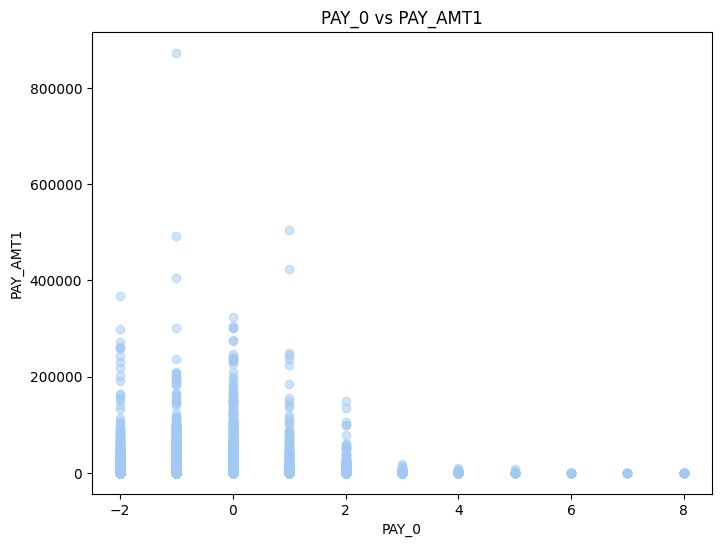

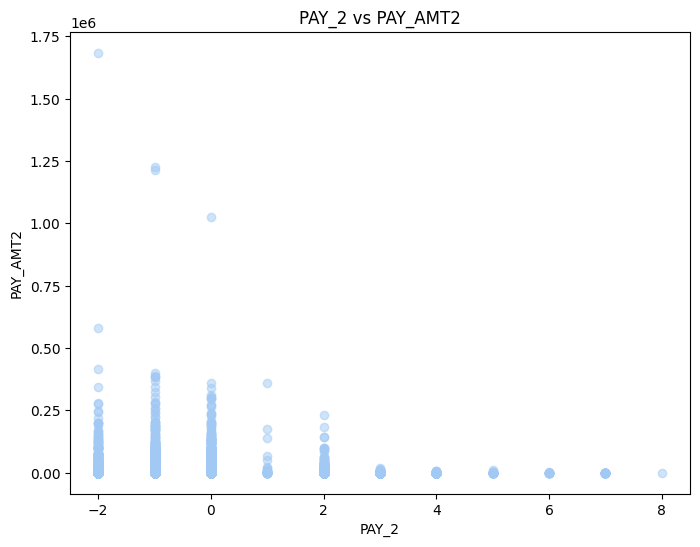

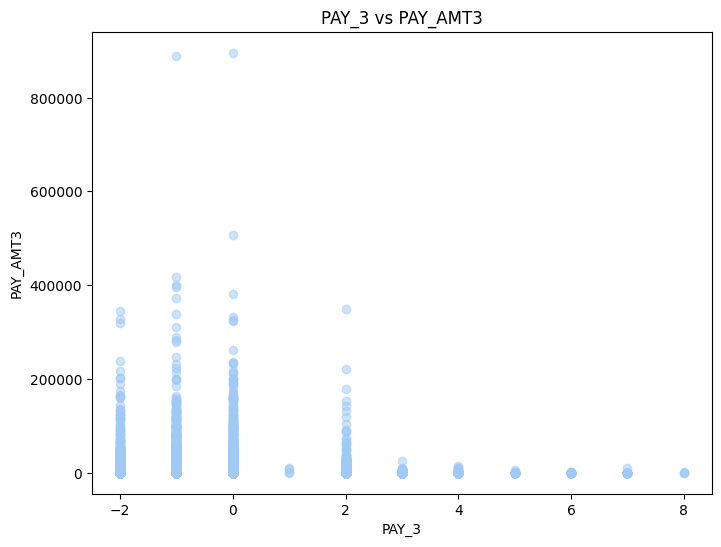

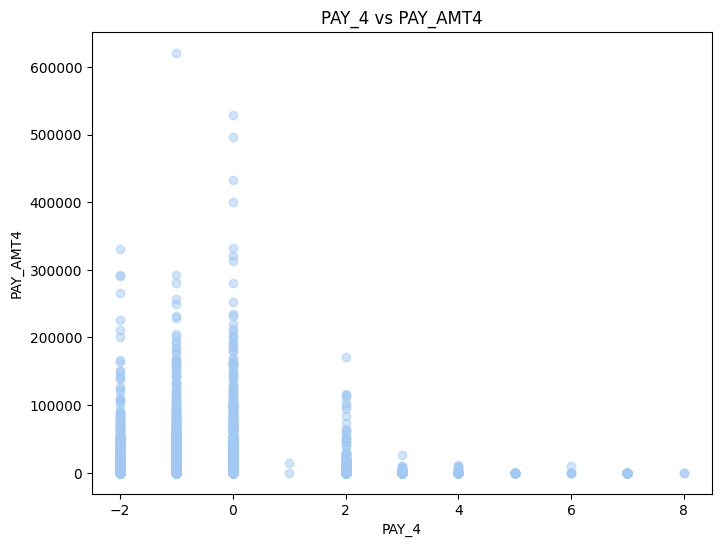

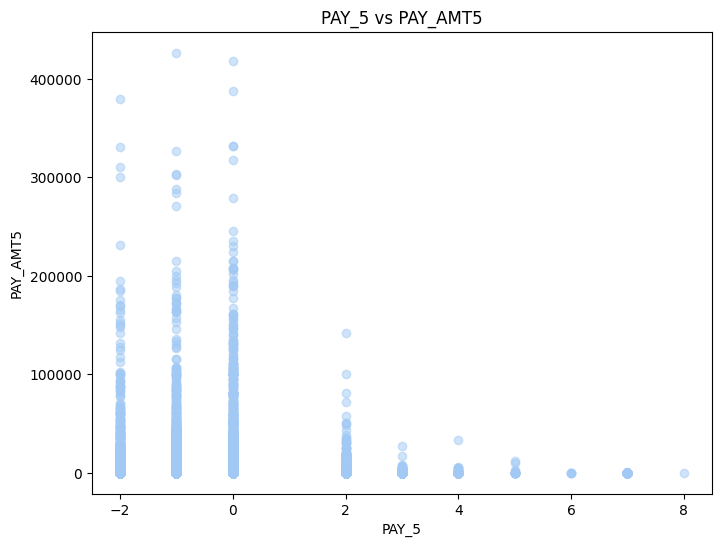

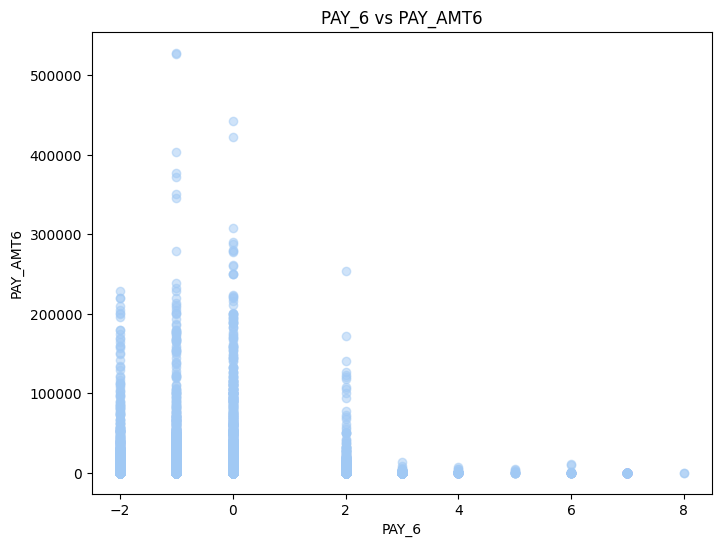

In [20]:
bill_columns = ['PAY_0','PAY_2', 'PAY_3', 'PAY_4', 'PAY_5', 'PAY_6']
pay_columns = ['PAY_AMT1', 'PAY_AMT2', 'PAY_AMT3', 'PAY_AMT4', 'PAY_AMT5', 'PAY_AMT6']

for bill_col, pay_col in zip(bill_columns, pay_columns):
    plt.figure(figsize=(8, 6))
    plt.scatter(creditcard_data[bill_col],creditcard_data[pay_col], alpha=0.5)
    plt.title(f'{bill_col} vs {pay_col}')
    plt.xlabel(bill_col)
    plt.ylabel(pay_col)
    plt.show()


##### 1. Why did you pick the specific chart?

**Bar plot to visualize the year-wise rented bike count. The choice of a bar plot is determined by the requirements of the data and the type of information you want to convey.**

*   Scatter plots allow you to visually assess the relationship between two variables.
*   Scatter plots can quickly gauge whether there is a linear or non-linear correlation between variables.
*   Scatter plots make it easy to spot outliers—data points that deviate significantly from the main trend.

##### 2. What is/are the insight(s) found from the chart?

The scatterplots suggest that there is no straightforward, linear relationship between payment history and payment amounts for the respective months.


*   **PAY_0 vs PAY_AMT1:** It indicates that the most recent payment status alone may not be a strong predictor of the first-month payment amount.
*   **PAY_2 vs PAY_AMT2:** The scatterplot for the second most recent payment status (PAY_2) and the payment amount for the second month (PAY_AMT2) shows a diverse distribution with no strong linear trend.
*   **PAY_3 vs PAY_AMT3:** There's no clear linear relationship between the third most recent payment status (PAY_3) and the payment amount for the third month (PAY_AMT3).
*   **PAY_4 vs PAY_AMT4:** The scatterplot for the fourth most recent payment status (PAY_4) and the payment amount for the fourth month (PAY_AMT4) also does not reveal a strong linear correlation.
*   **PAY_5 vs PAY_AMT5:** There is no apparent linear relationship between the fifth most recent payment status (PAY_5) and the payment amount for the fifth month (PAY_AMT5).
*   **PAY_6 vs PAY_AMT6:** The scatterplot for the sixth most recent payment status (PAY_6) and the payment amount for the sixth month (PAY_AMT6) once again shows a diverse distribution with no strong linear trend.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.



*   **Non-linearity in payment history:** From insights of above chart it shows absence of a strong linear relationship between payment history and payment amounts.By applying additional factors into credit risk models, a company can make more informed lending and credit decisions, potentially reducing defaults and increasing profitability.

#### Chart - 5

#### Top 10 limit balance and count

(This chart is only for information)

In [21]:
creditcard_data.columns

Index(['ID', 'LIMIT_BAL', 'SEX', 'EDUCATION', 'MARRIAGE', 'AGE', 'PAY_0',
       'PAY_2', 'PAY_3', 'PAY_4', 'PAY_5', 'PAY_6', 'BILL_AMT1', 'BILL_AMT2',
       'BILL_AMT3', 'BILL_AMT4', 'BILL_AMT5', 'BILL_AMT6', 'PAY_AMT1',
       'PAY_AMT2', 'PAY_AMT3', 'PAY_AMT4', 'PAY_AMT5', 'PAY_AMT6',
       'default_payment_next_month'],
      dtype='object')

LIMIT_BAL
50000     3365
20000     1976
30000     1610
80000     1567
200000    1528
150000    1110
100000    1048
180000     995
360000     881
60000      825
Name: ID, dtype: int64


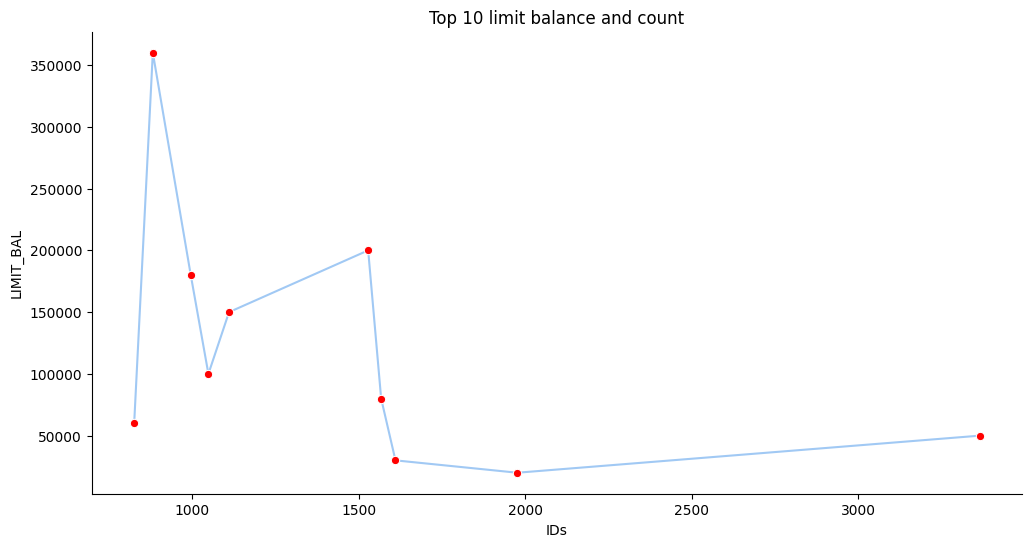

In [22]:
top_10_limit_bal = creditcard_data.groupby('LIMIT_BAL')['ID'].count()

sorted_top_10_limit_bal = top_10_limit_bal.sort_values(ascending=False)

top_10 = sorted_top_10_limit_bal.head(10)

print(top_10)

f,ax = plt.subplots(figsize=(12,6))
sns.despine(f)
sns.lineplot(x = top_10.values,y= top_10.index,data=top_10,marker='o',markerfacecolor='red')
plt.xlabel('IDs')
plt.ylabel('LIMIT_BAL')
plt.title('Top 10 limit balance and count')
plt.show()

#### Chart - 6

#### Defaulter Count plot

0    23364
1     6636
Name: default_payment_next_month, dtype: int64


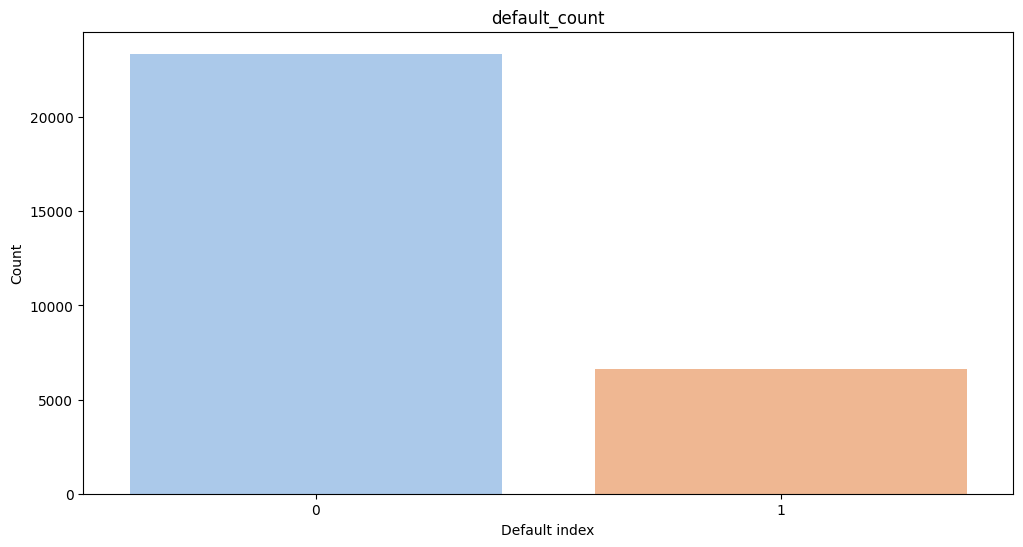

In [23]:
default_count = creditcard_data['default_payment_next_month'].value_counts()

print(default_count)

f = plt.figure(figsize=(12,6))
sns.despine(f)
sns.barplot(y=default_count.values, x=default_count.index,data=creditcard_data)  #(1 = yes, 0 = no).
plt.xlabel('Default index')
plt.ylabel('Count')
plt.title('default_count')
plt.show()

##### 1. Why did you pick the specific chart?

**Bar plot to visualize the Defaulter Count plot. The choice of a bar plot is determined by the requirements of the data and the type of information you want to convey.**

*   Bar plots are commonly used to display categorical data, where each bar represents a category and the height of the bar represents a numerical value
*   Bar plots are effective for comparing the values of different categories or groups, making it easy to see which years had higher or lower bike counts.


##### 2. What is/are the insight(s) found from the chart?



*   Barplot indicates that the majority of credit card users in the dataset did not default on their payments.
*   The category (0) significantly outnumbers the category (1). This indicates that there are more instances of non-default payments than default payments.



##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.



*   By analyzing the defaulter distribution, businesses, especially credit card companies or financial institutions, can better assess and manage credit risk. They can implement risk mitigation strategies to reduce losses due to defaults, such as setting appropriate credit limits, offering targeted financial products, and pricing strategies.

#### Chart - 7

##### Marriage and Defaulter count

MARRIAGE
0       54
1    13659
2    15964
3      323
Name: default_payment_next_month, dtype: int64


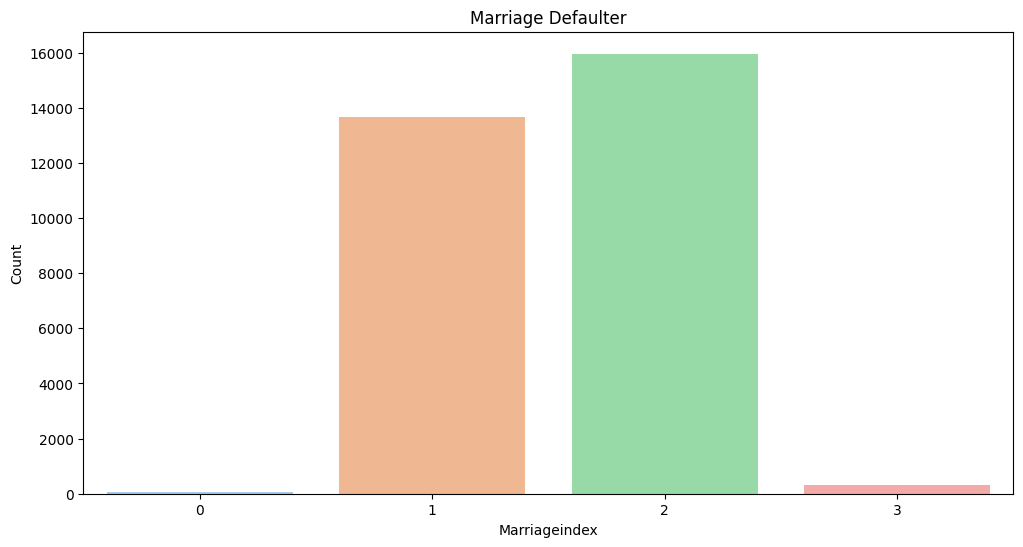

In [24]:
marriage_defaulter =  creditcard_data.groupby('MARRIAGE')['default_payment_next_month'].count()

print(marriage_defaulter)     #(0=unknown,1 = married, 2 = single, 3 = others).

f = plt.figure(figsize=(12,6))
sns.despine(f)
sns.barplot(y=marriage_defaulter.values, x=marriage_defaulter.index,data=creditcard_data)
plt.xlabel('Marriageindex')
plt.ylabel('Count')
plt.title('Marriage Defaulter')
plt.show()

##### 1. Why did you pick the specific chart?

**Bar plot to visualize the Marriage and Defaulter count. The choice of a bar plot is determined by the requirements of the data and the type of information you want to convey.**

*   Bar plots are commonly used to display categorical data, where each bar represents a category and the height of the bar represents a numerical value
*   Bar plots are effective for comparing the values of different categories or groups, making it easy to see which years had higher or lower bike counts.


##### 2. What is/are the insight(s) found from the chart?



*   The chart indicates the relationship between marriage status and the count of default payments.
*   The "married" category (1) shows the count of default payments for married individuals. It provides insights into whether being married is associated with a higher or lower likelihood of default.
*   The "single" category (2) also displays the count of default payments. It helps in understanding whether single individuals are more or less likely to default.
*   The "others" category (3) represents individuals with marriage statuses categorized as "others."





#### Chart - 8

##### Age Group wise defaulter count

29    1605
27    1477
28    1409
30    1395
26    1256
Name: AGE, dtype: int64


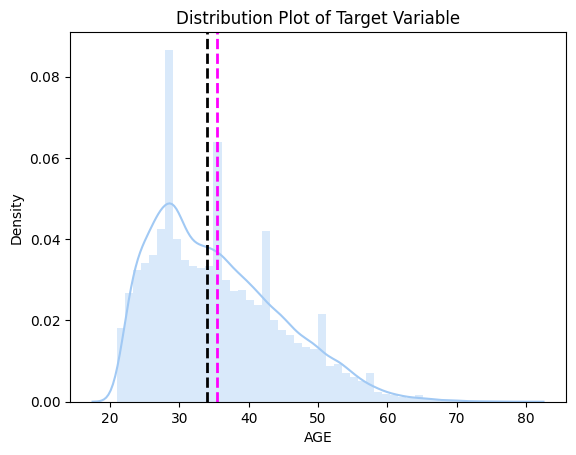

In [25]:
agewise_defalter = creditcard_data['AGE'].value_counts().head()

print(agewise_defalter)

dist = sns.distplot(creditcard_data['AGE'],hist=True)
dist.set(xlabel = 'AGE', ylabel ='Density', title = 'Distribution Plot of Target Variable')

dist.axvline(creditcard_data['AGE'].mean(), color='magenta', linestyle='dashed', linewidth=2)

dist.axvline(creditcard_data['AGE'].median(), color='black', linestyle='dashed', linewidth=2)

##### 1. Why did you pick the specific chart?

**The specific chart chosen in this code is a distribution plot, and it was selected as based on the nature of the data and the information that needed to be conveyed.**
*   Histograms are particularly effective for visualizing the distribution of continuous data.
*   A histogram provides information about the density of data points within various value ranges.
*   Histograms allow you to see the range of values within a dataset, including the presence of outliers.

##### 2. What is/are the insight(s) found from the chart?

*   The purpose of this chart is to display the distribution of the "AGE" variable in the dataset.
*   Histograms are effective in visualizing the central tendency of a dataset, such as whether the data is symmetrically distributed around a central value or skewed to one side.
*   The density plot shows the concentration of age values in different regions. Higher peaks represent higher concentrations of individuals at certain ages.
*   If the mean is roughly equal to the median, the distribution is approximately symmetrical.
*   The magenta line appears to be slightly to the right of the black line, suggesting a right-skewed distribution.

*   Mean and median of histogram nearly in range 32 to 37.



##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

*   The chart can be valuable for making decisions related to marketing, product development, or risk assessment based on age groups.

#### Chart - 9

##### Distribution plot for all variables

In [26]:
creditcard_data.shape

(30000, 25)

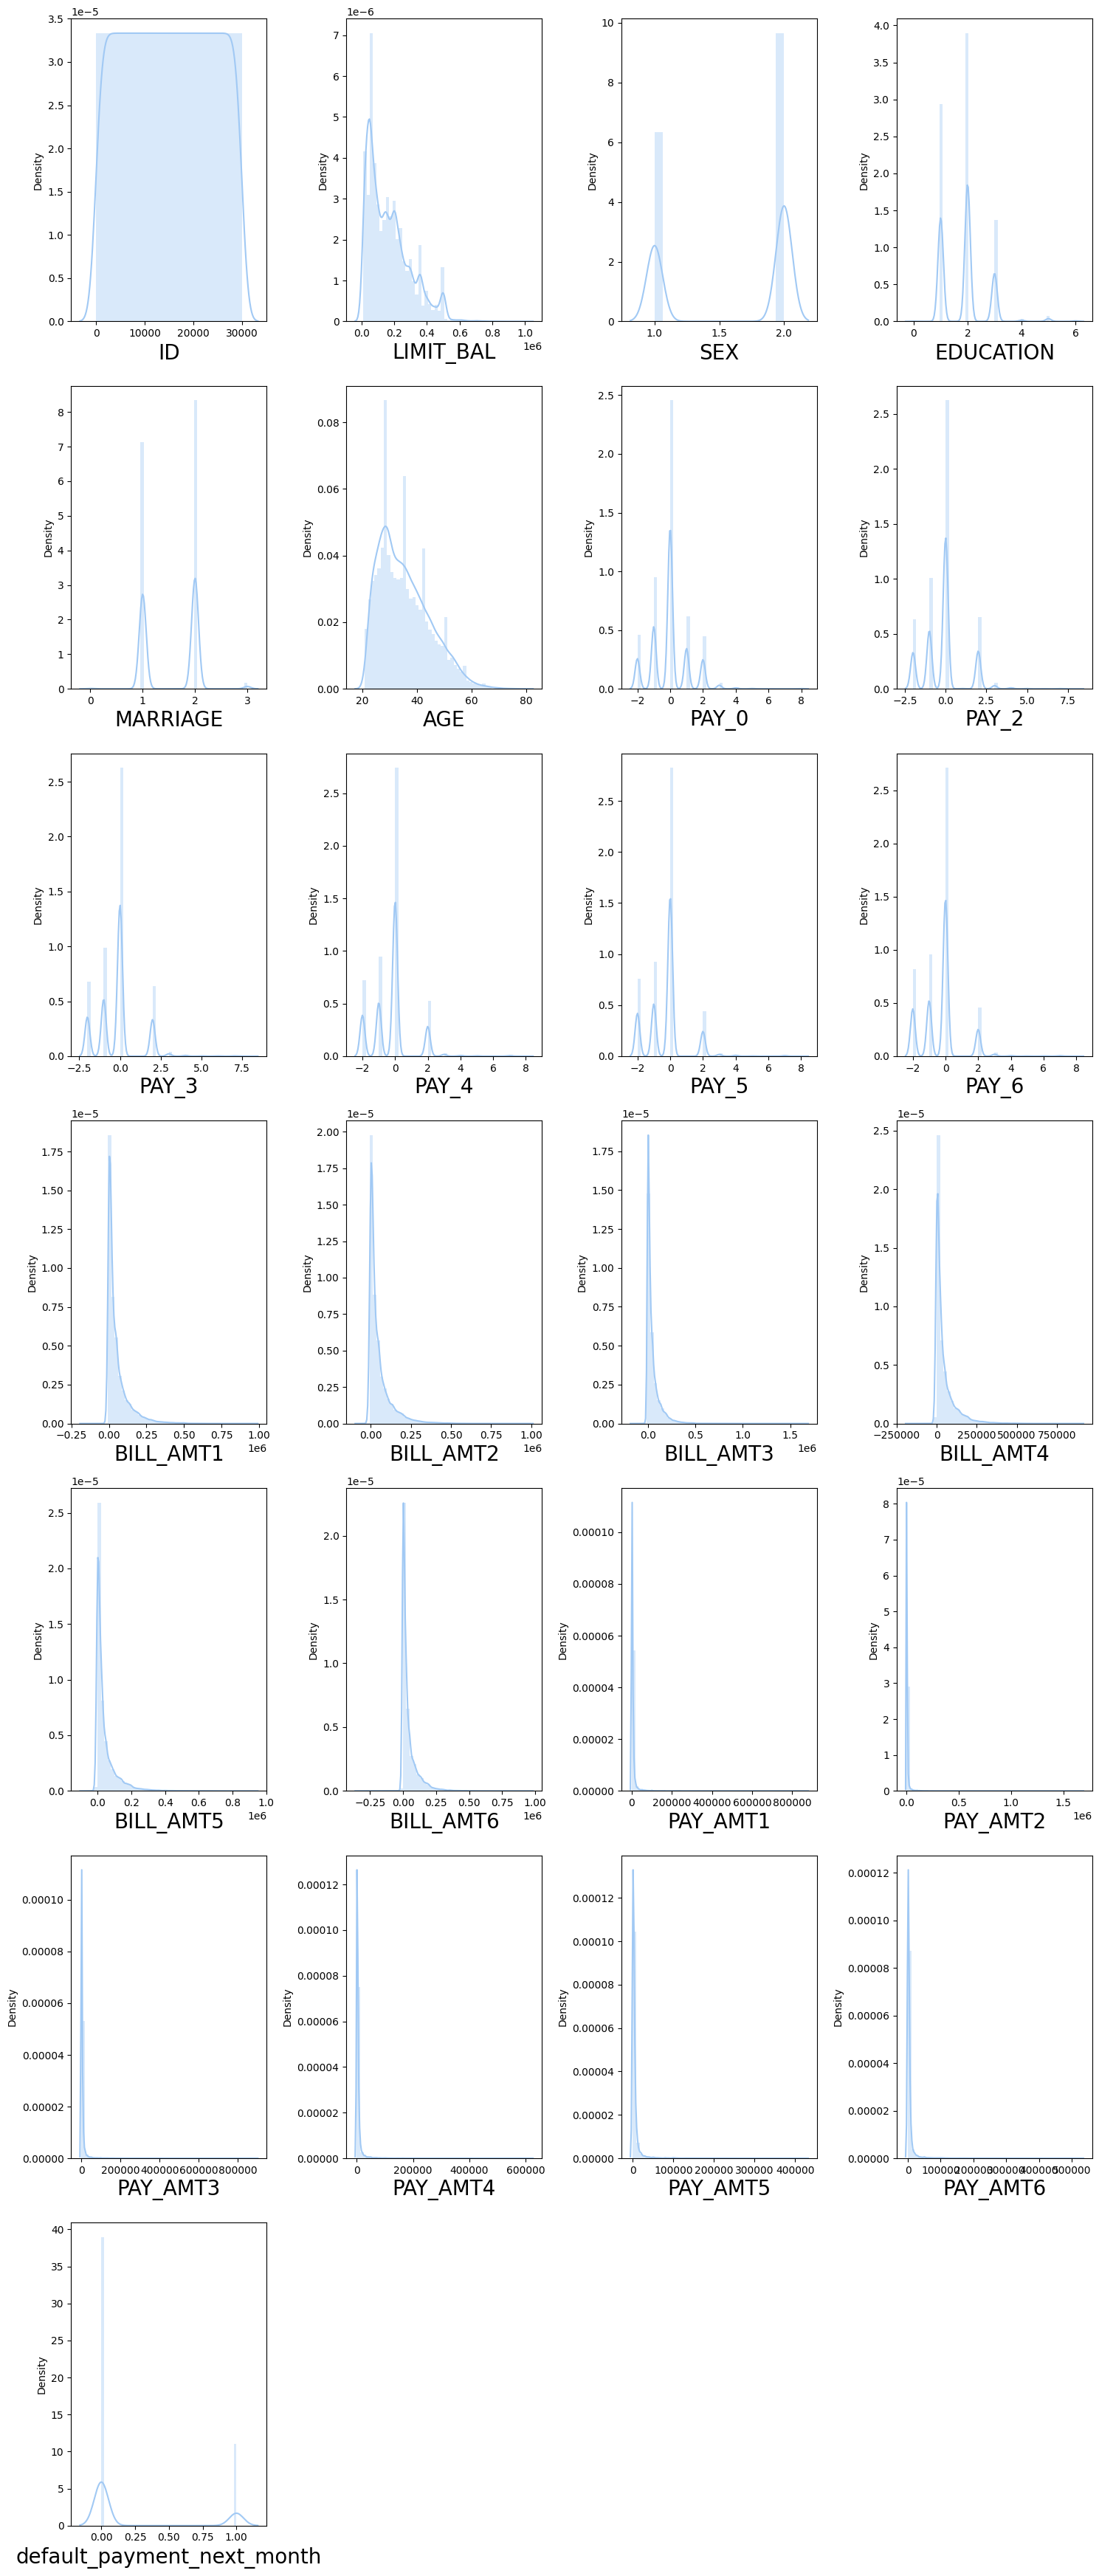

In [27]:
plt.figure(figsize=(15,35))
plotnumber=1

for column in creditcard_data:
  if plotnumber<=25:
    ax=plt.subplot(7,4,plotnumber)
    sns.distplot(creditcard_data[column])
    plt.xlabel(column,fontsize=20)
  plotnumber+=1
plt.tight_layout()

##### 1. Why did you pick the specific chart?

**The specific chart chosen in this code is a distribution plot, and it was selected as based on the nature of the data and the information that needed to be conveyed.**
*   Histograms are particularly effective for visualizing the distribution of continuous data.
*   A histogram provides information about the density of data points within various value ranges.
*   Histograms allow you to see the range of values within a dataset, including the presence of outliers.

##### 2. What is/are the insight(s) found from the chart?



*   "LIMIT_BAL" has a right-skewed distribution, meaning that there is a concentration of credit limits at lower values with a long tail extending towards higher credit limits. This indicates that a significant portion of credit card users have lower credit limits.
*   "SEX","EDUCATION","MARRIAGE" feature is categorical, and a distplot is not the best way to visualize it.
*   "AGE" appears somewhat normal or bell-shaped, with a peak around the mid-20s to early 30s.
*   "PAY_0" to "PAY_6" these features represent the payment status for the previous six months. The distributions appear to have multiple peaks, suggesting that different groups of credit card users have different payment behaviors.
*   "BILL_AMT1" to "BILL_AMT6" distributions of billing amounts for the previous six months appear right-skewed, indicating that many users have lower billing amounts, but some have higher amounts.
*   "PAY_AMT1" to "PAY_AMT6" distributions of payment amounts for the previous six months are right-skewed as well. Most users make smaller payments, but there are some larger payments, possibly to clear outstanding balances.

#### Chart - 10

##### Scatter Plot

(This Chart for only information)

<Axes: xlabel='default_payment_next_month', ylabel='MARRIAGE'>

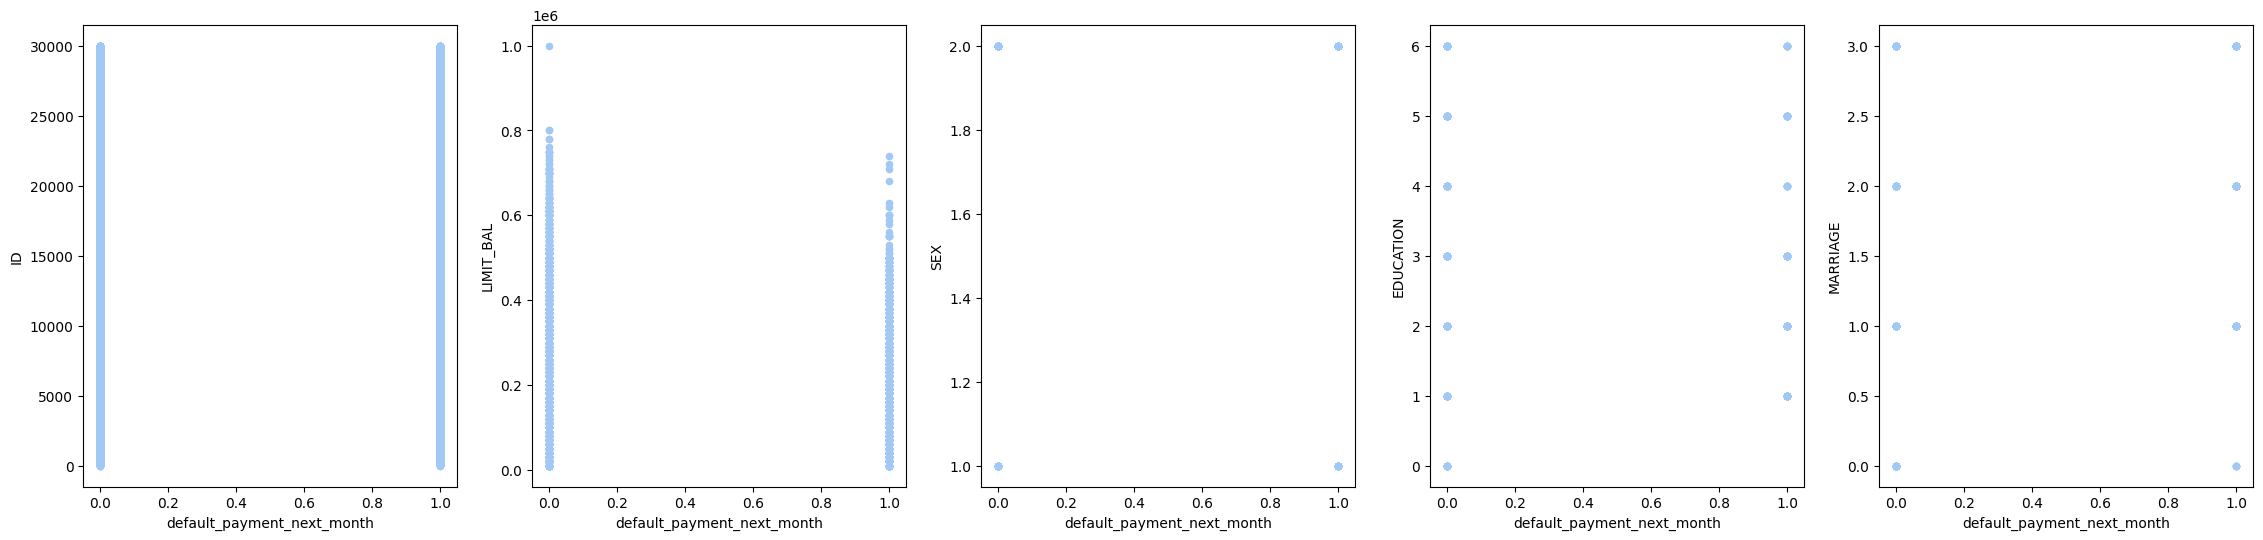

In [28]:
# Part 1

fig,axs = plt.subplots(1,5)

creditcard_data.plot(kind='scatter',y='ID',x='default_payment_next_month',ax=axs[0],figsize=(28,6))

creditcard_data.plot(kind='scatter',y='LIMIT_BAL',x='default_payment_next_month',ax=axs[1],figsize=(28,6))

creditcard_data.plot(kind='scatter',y='SEX',x='default_payment_next_month',ax=axs[2],figsize=(28,6))

creditcard_data.plot(kind='scatter',y='EDUCATION',x='default_payment_next_month',ax=axs[3],figsize=(28,6))

creditcard_data.plot(kind='scatter',y='MARRIAGE',x='default_payment_next_month',ax=axs[4],figsize=(28,6))

<Axes: xlabel='default_payment_next_month', ylabel='PAY_4'>

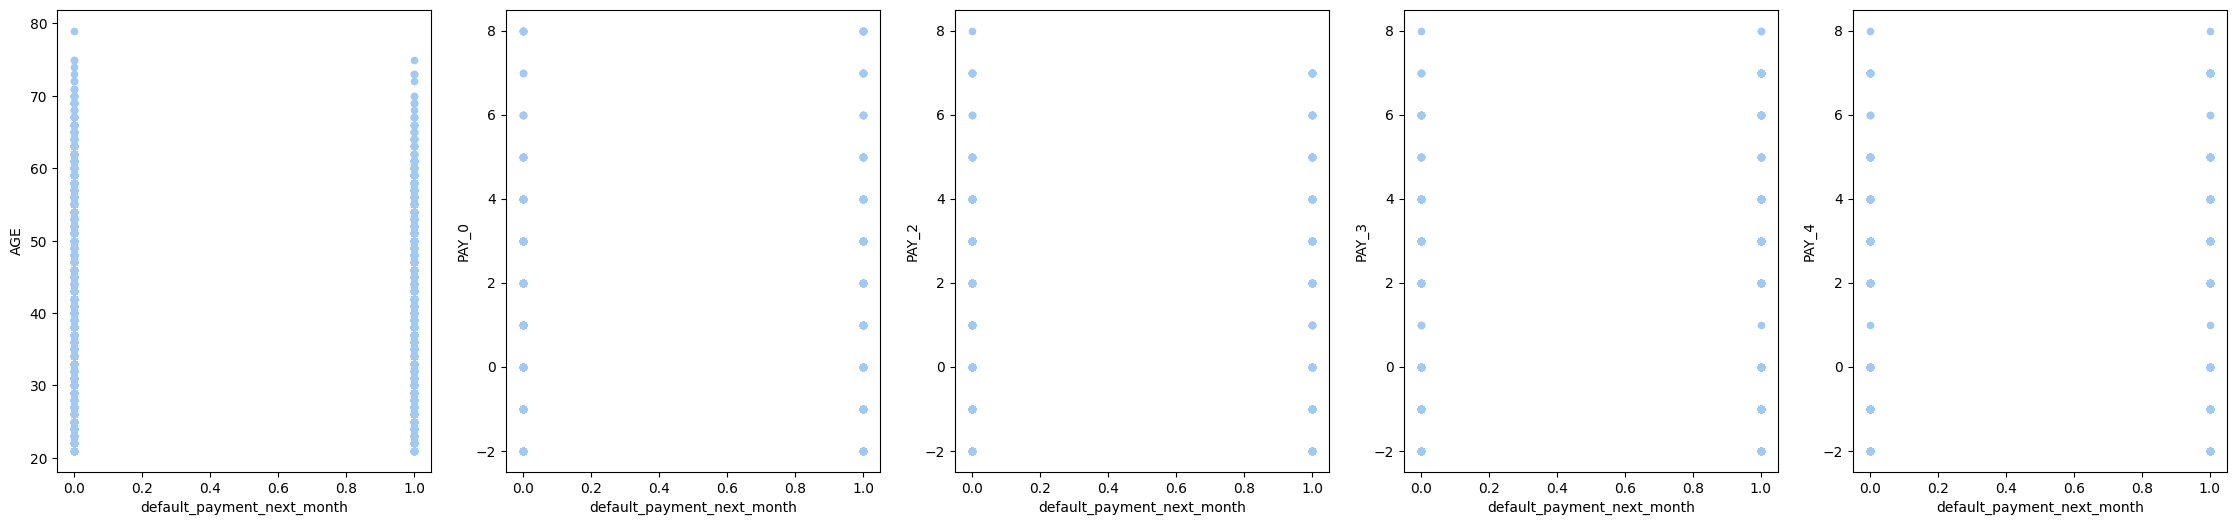

In [29]:
# Part 2

fig,axs = plt.subplots(1,5)

creditcard_data.plot(kind='scatter',y='AGE',x='default_payment_next_month',ax=axs[0],figsize=(28,6))

creditcard_data.plot(kind='scatter',y='PAY_0',x='default_payment_next_month',ax=axs[1],figsize=(28,6))

creditcard_data.plot(kind='scatter',y='PAY_2',x='default_payment_next_month',ax=axs[2],figsize=(28,6))

creditcard_data.plot(kind='scatter',y='PAY_3',x='default_payment_next_month',ax=axs[3],figsize=(28,6))

creditcard_data.plot(kind='scatter',y='PAY_4',x='default_payment_next_month',ax=axs[4],figsize=(28,6))

<Axes: xlabel='default_payment_next_month', ylabel='BILL_AMT3'>

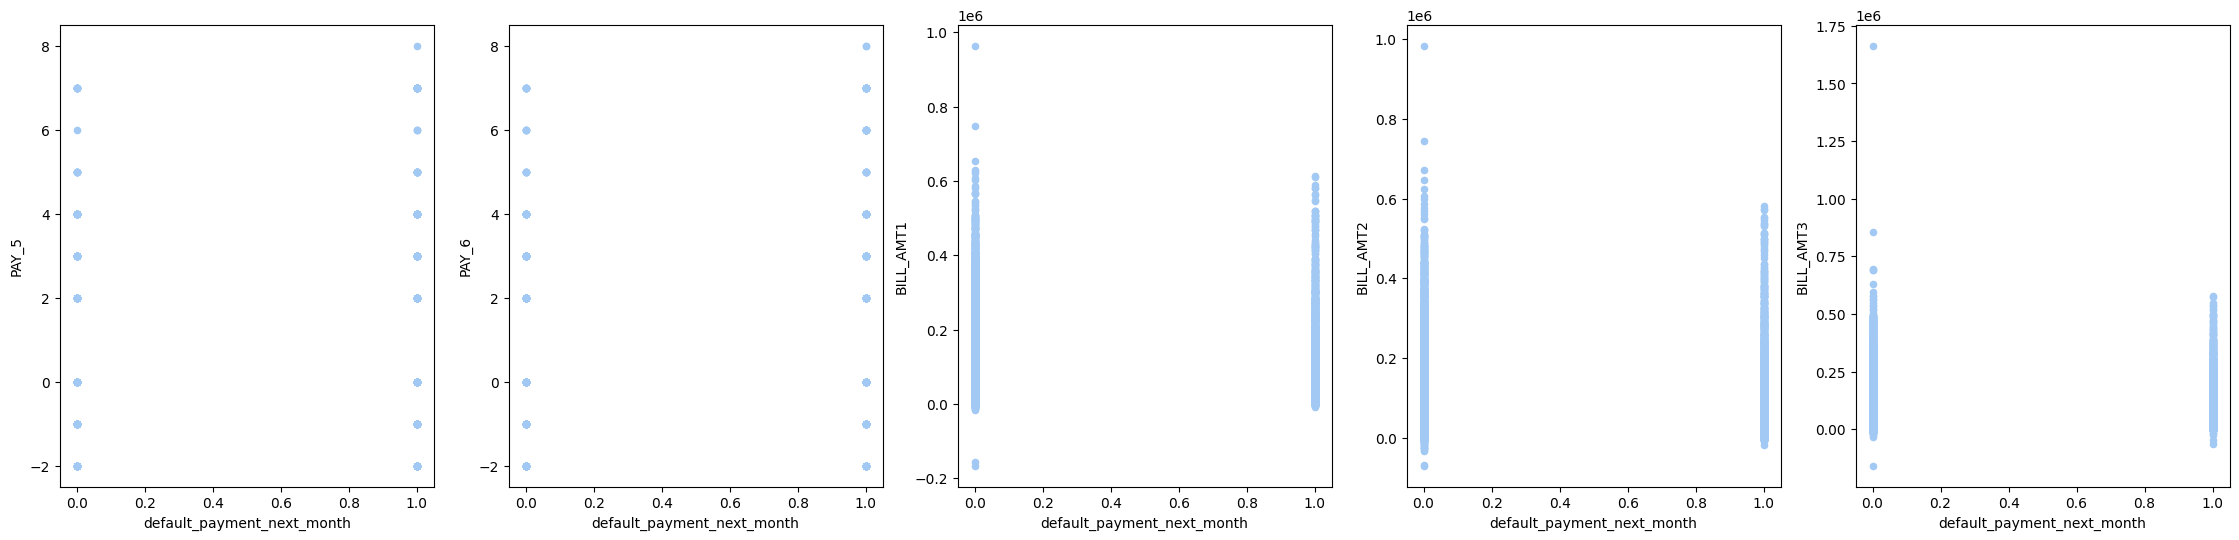

In [30]:
# Part 3

fig,axs = plt.subplots(1,5)

creditcard_data.plot(kind='scatter',y='PAY_5',x='default_payment_next_month',ax=axs[0],figsize=(28,6))

creditcard_data.plot(kind='scatter',y='PAY_6',x='default_payment_next_month',ax=axs[1],figsize=(28,6))

creditcard_data.plot(kind='scatter',y='BILL_AMT1',x='default_payment_next_month',ax=axs[2],figsize=(28,6))

creditcard_data.plot(kind='scatter',y='BILL_AMT2',x='default_payment_next_month',ax=axs[3],figsize=(28,6))

creditcard_data.plot(kind='scatter',y='BILL_AMT3',x='default_payment_next_month',ax=axs[4],figsize=(28,6))

<Axes: xlabel='default_payment_next_month', ylabel='PAY_AMT2'>

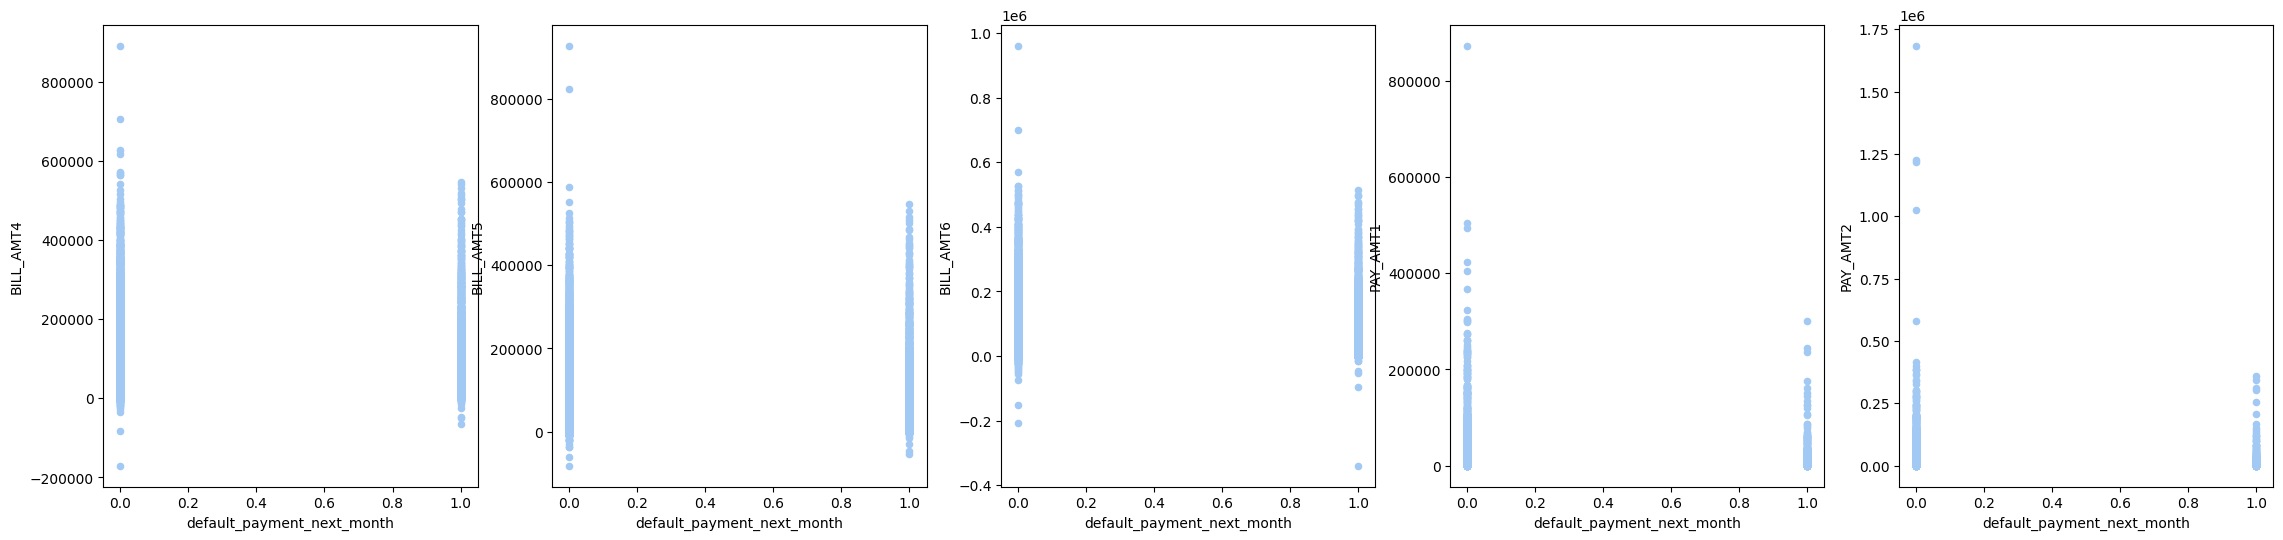

In [31]:
# Part 4

fig,axs = plt.subplots(1,5)

creditcard_data.plot(kind='scatter',y='BILL_AMT4',x='default_payment_next_month',ax=axs[0],figsize=(28,6))

creditcard_data.plot(kind='scatter',y='BILL_AMT5',x='default_payment_next_month',ax=axs[1],figsize=(28,6))

creditcard_data.plot(kind='scatter',y='BILL_AMT6',x='default_payment_next_month',ax=axs[2],figsize=(28,6))

creditcard_data.plot(kind='scatter',y='PAY_AMT1',x='default_payment_next_month',ax=axs[3],figsize=(28,6))

creditcard_data.plot(kind='scatter',y='PAY_AMT2',x='default_payment_next_month',ax=axs[4],figsize=(28,6))

<Axes: xlabel='default_payment_next_month', ylabel='PAY_AMT6'>

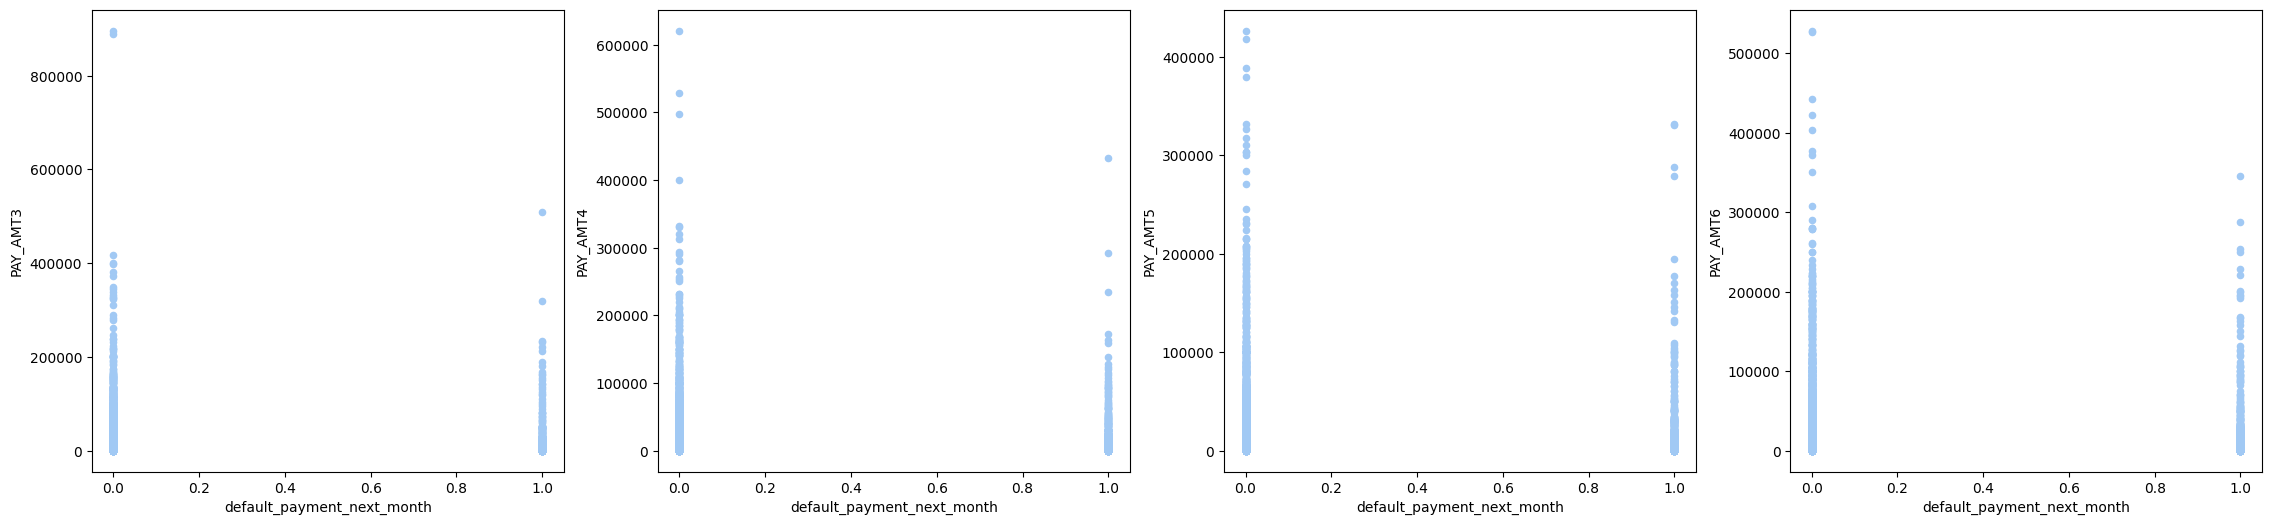

In [32]:
# Part 5

fig,axs = plt.subplots(1,4)

creditcard_data.plot(kind='scatter',y='PAY_AMT3',x='default_payment_next_month',ax=axs[0],figsize=(28,6))

creditcard_data.plot(kind='scatter',y='PAY_AMT4',x='default_payment_next_month',ax=axs[1],figsize=(28,6))

creditcard_data.plot(kind='scatter',y='PAY_AMT5',x='default_payment_next_month',ax=axs[2],figsize=(28,6))

creditcard_data.plot(kind='scatter',y='PAY_AMT6',x='default_payment_next_month',ax=axs[3],figsize=(28,6))

#### Chart - 09 - Correlation Heatmap

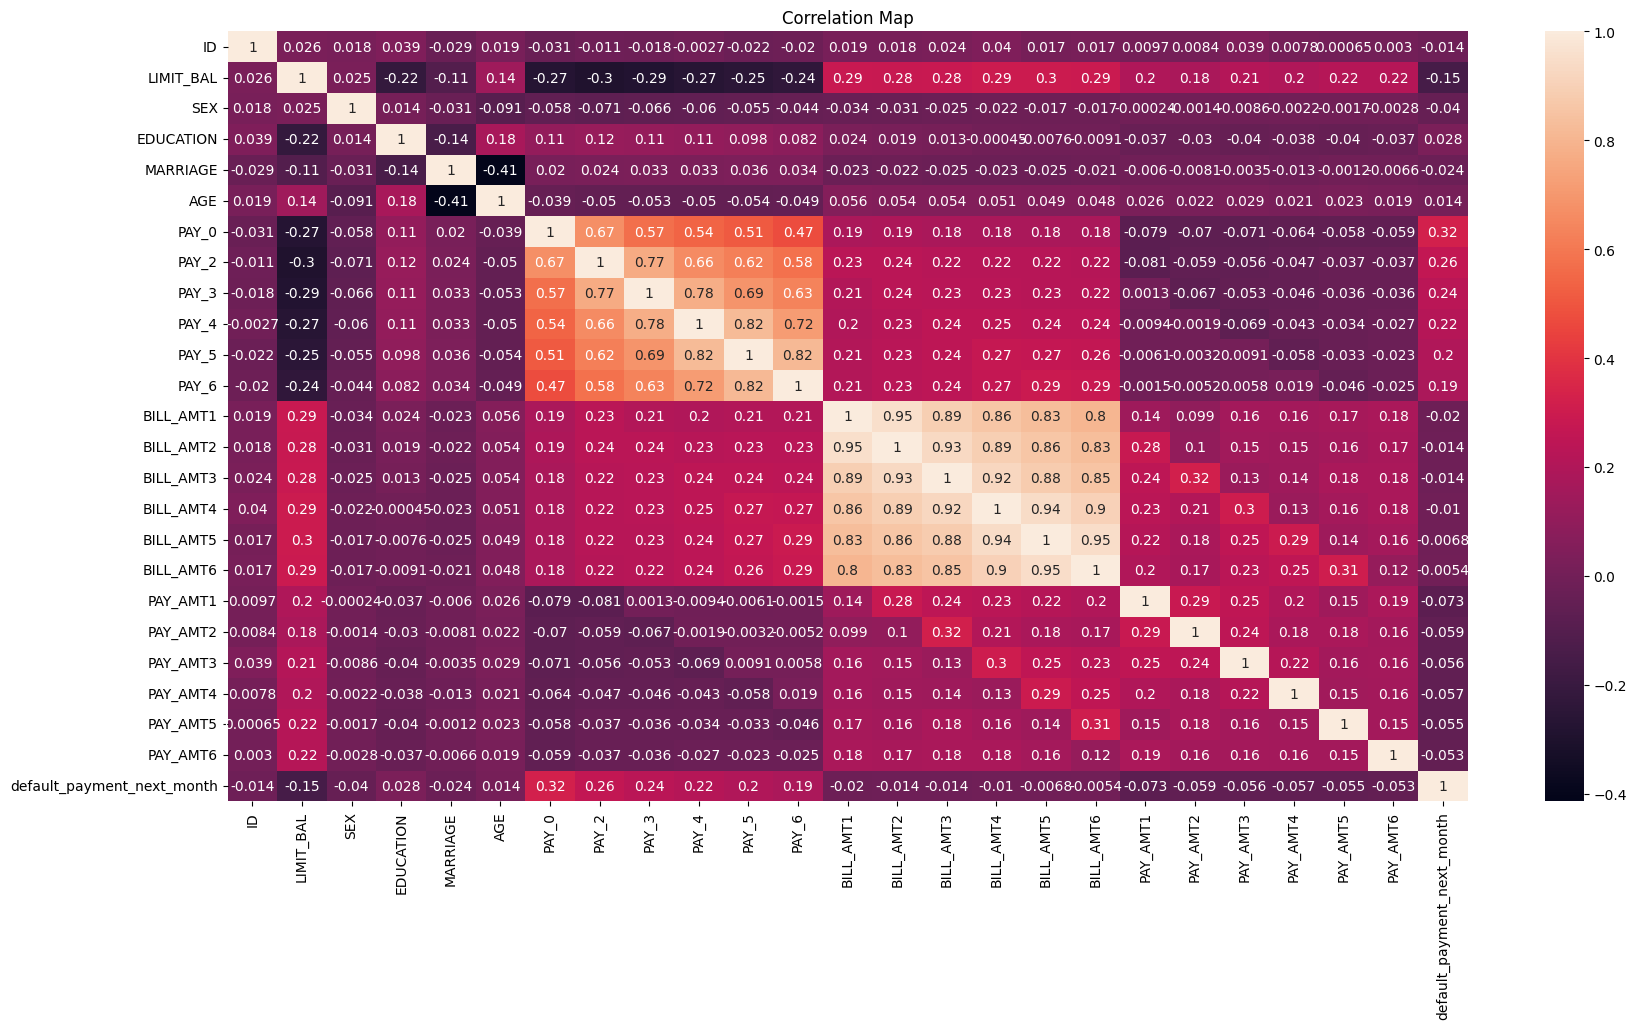

In [33]:
numerical_cols = ['ID', 'LIMIT_BAL', 'SEX', 'EDUCATION', 'MARRIAGE', 'AGE', 'PAY_0',
       'PAY_2', 'PAY_3', 'PAY_4', 'PAY_5', 'PAY_6', 'BILL_AMT1', 'BILL_AMT2',
       'BILL_AMT3', 'BILL_AMT4', 'BILL_AMT5', 'BILL_AMT6', 'PAY_AMT1',
       'PAY_AMT2', 'PAY_AMT3', 'PAY_AMT4', 'PAY_AMT5', 'PAY_AMT6',
       'default_payment_next_month']

correlation_data = creditcard_data[numerical_cols]

correlation_matrix = correlation_data.corr()

plt.figure(figsize=(20,10))

sns.heatmap(correlation_matrix,annot=True)
plt.title('Correlation Map')
plt.show()

##### 1. Why did you pick the specific chart?

**This graph will show us correlation between numerical columns from dataset.**

##### 2. What is/are the insight(s) found from the chart?

*   **Positive Correlation:** "BILL_AMT1" and "BILL_AMT2" have a high positive correlation, it indicates that the billing amount for one month is positively related to the billing amount for the next month. Along with same "BILL_AMT3" and "BILL_AMT2" have have positive coorelation.
*   **Negative Correlation:**  "PAY_0" (payment status in the current month) and "BILL_AMT1" (billing amount in the current month) have a high negative correlation, it suggests that a higher payment status is associated with lower billing amounts.
*   **Multi-collinearity:** "BILL_AMT4" and "BILL_AMT3" , "BILL_AMT5" and "BILL_AMT4","BILL_AMT6" and "BILL_AMT5" having positive collinearity.

#### Chart - 15 - Pair Plot

<Figure size 1000x800 with 0 Axes>

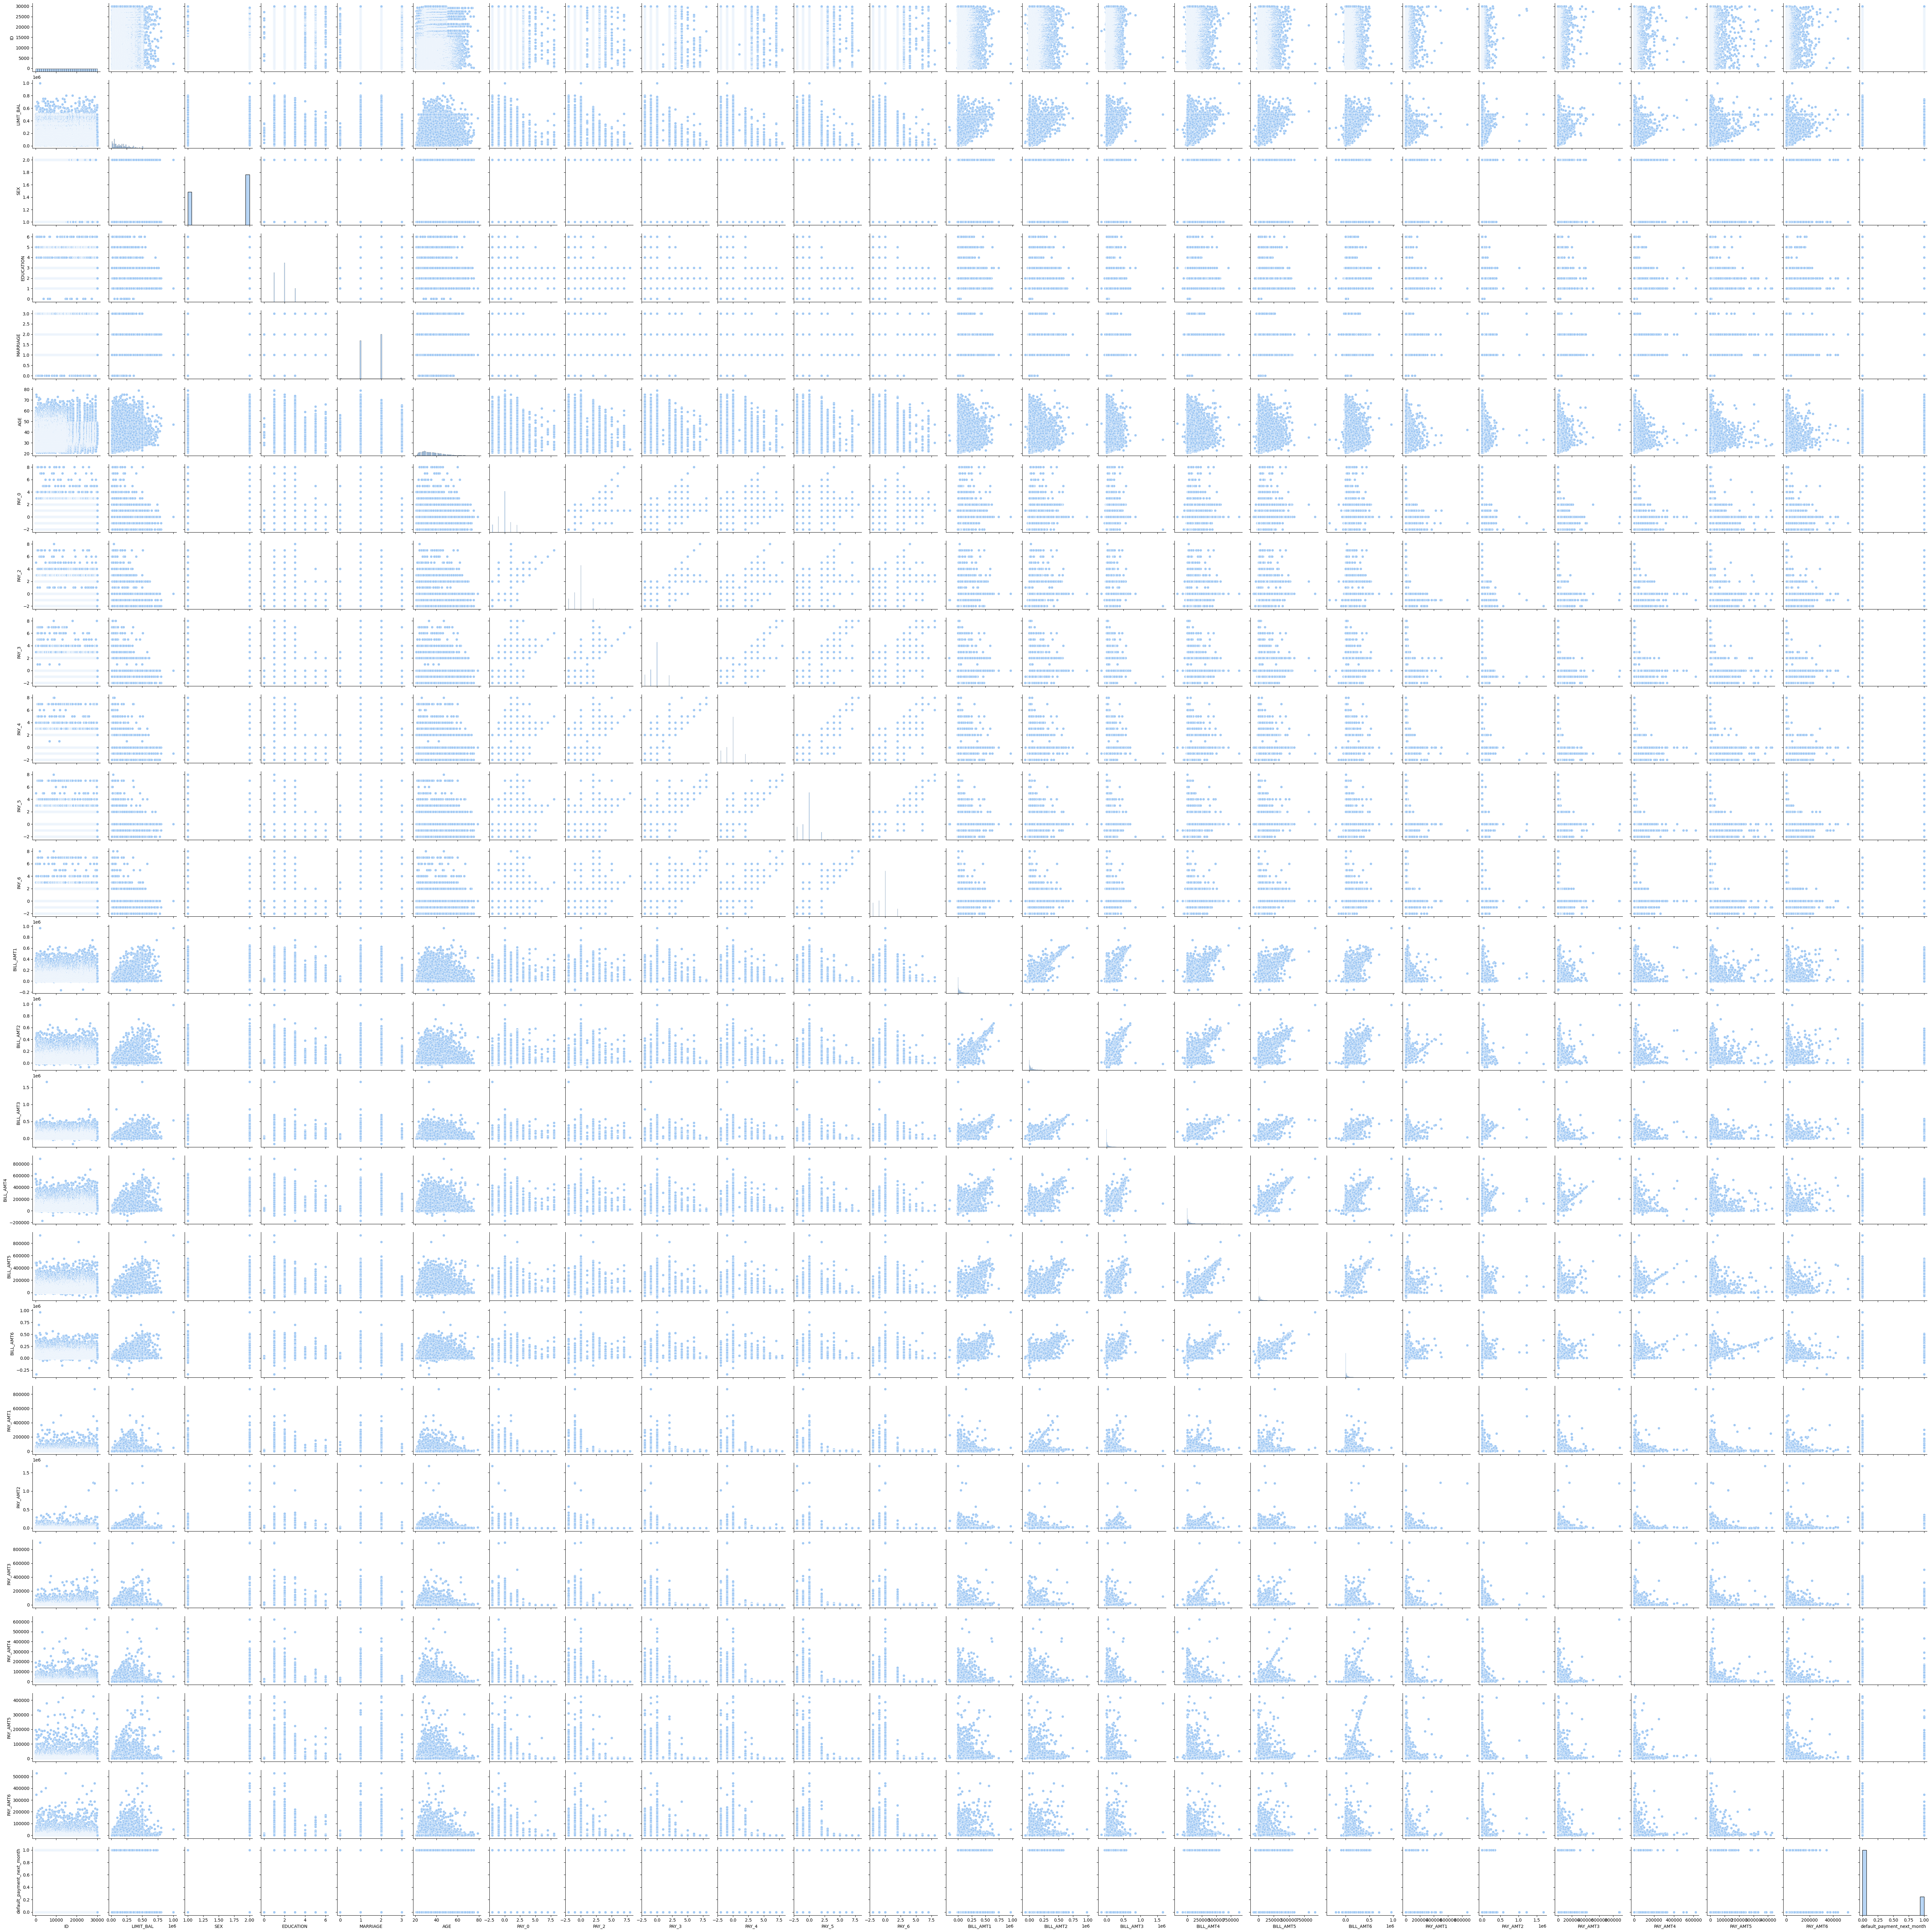

In [34]:
numerical_cols = ['ID', 'LIMIT_BAL', 'SEX', 'EDUCATION', 'MARRIAGE', 'AGE', 'PAY_0',
       'PAY_2', 'PAY_3', 'PAY_4', 'PAY_5', 'PAY_6', 'BILL_AMT1', 'BILL_AMT2',
       'BILL_AMT3', 'BILL_AMT4', 'BILL_AMT5', 'BILL_AMT6', 'PAY_AMT1',
       'PAY_AMT2', 'PAY_AMT3', 'PAY_AMT4', 'PAY_AMT5', 'PAY_AMT6',
       'default_payment_next_month']

numerical_cols

pairplot_data = creditcard_data[numerical_cols]
plt.figure(figsize=(10,8))
sns.pairplot(pairplot_data)
plt.show()

##### 1. Why did you pick the specific chart?

**This graph will help to show relationship between all variables from dataset.**

##### 2. What is/are the insight(s) found from the chart?

*   We can observe a positive correlation between "BILL_AMT1" and "BILL_AMT2," indicating that billing amounts for two consecutive months tend to be positively related.
*   "PAY_0" and "PAY_AMT1" show a negative correlation, suggesting that as the payment status improves (lower values in "PAY_0"), the payment amount tends to increase.
*   we can identify  outliers in the "LIMIT_BAL" vs. "AGE" scatterplot, where there are a few data points with high credit limits and low ages.
*   "BILL_AMT1" and "BILL_AMT2," or "PAY_0" and "PAY_2," having multicollinearity in these pairs.
*   "BILL_AMT1" and "BILL_AMT2" have a strong positive correlation, and you might consider keeping only one of these features in your modeling to reduce redundancy.
*   Categorical features like "SEX," "EDUCATION," and "MARRIAGE" are not suitable for scatterplots in a pair plot.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.



*   Risk Management: Understanding correlations and patterns in features like payment history ("PAY_0" to "PAY_6") can lead to better risk assessment.
*   Feature Selection: Identifying highly correlated features allows for more efficient feature selection. By keeping only one of the highly correlated features, you can reduce the complexity of predictive models while maintaining or even improving their performance.



## ***5. Hypothesis Testing***

### Based on your chart experiments, define three hypothetical statements from the dataset. In the next three questions, perform hypothesis testing to obtain final conclusion about the statements through your code and statistical testing.

### Hypothetical Statement - 1

#### State Your research hypothesis as a null hypothesis and alternate hypothesis.

**"There is a significant difference in the average 'AGE' between customers who default and those who do not."**

Null Hypothesis :  There is no significant difference in the average 'AGE' between customers who default and those who do not.(Ho)
Alternative Hypothesis : There is a significant difference in the average 'AGE' between the two groups.(H1)

#### Perform an appropriate statistical test.

In [35]:
from scipy import stats

# Seperating with defaulter index

default_group = creditcard_data[creditcard_data['default_payment_next_month'] == 1]
non_default_group = creditcard_data[creditcard_data['default_payment_next_month'] == 0]

# Using t-Test

t_stat, p_value = stats.ttest_ind(default_group['AGE'], non_default_group['AGE'])

print("t-statistic:", t_stat)
print("p-value:", p_value)

if p_value < 0.05:
    print("Reject the null hypothesis: There is a significant difference in the average 'AGE' between the two groups")
else:
    print("Fail to reject the null hypothesis")

t-statistic: 2.40594177499625
p-value: 0.016136845890163835
Reject the null hypothesis: There is a significant difference in the average 'AGE' between the two groups


### Hypothetical Statement - 2

#### State Your research hypothesis as a null hypothesis and alternate hypothesis.

**The 'EDUCATION' level of customers is independent of their payment default status ('default_payment_next_month').**

Null Hypothesis : The 'EDUCATION' level of customers is independent of their payment default status.(H0)

Alternative Hypothesis : The 'EDUCATION' level of customers is associated with their payment default status.(H1)

#### Perform an appropriate statistical test.

In [36]:
from scipy.stats import chi2_contingency

# Using chi-squar test

contingency_table = pd.crosstab(creditcard_data['EDUCATION'], creditcard_data['default_payment_next_month'])

chi2, p, dof, expected = chi2_contingency(contingency_table)

print("Chi-squared statistic:", chi2)
print("p-value:", p)

if p_value < 0.05:
    print("Reject the null hypothesis:  The 'EDUCATION' level of customers is associated with their payment default status.")
else:
    print("Fail to reject the null hypothesis")

Chi-squared statistic: 163.21655786997073
p-value: 1.2332626245415605e-32
Reject the null hypothesis:  The 'EDUCATION' level of customers is associated with their payment default status.


### Hypothetical Statement - 3

#### State Your research hypothesis as a null hypothesis and alternate hypothesis.

**There is a relationship between 'PAY_0' (payment status in the current month) and 'PAY_2' (payment status in the previous month).**

Null Hypothesis : 'PAY_0' and 'PAY_2' are independent of each other.(H0)

Alternative Hypothesis : There is a relationship between 'PAY_0' and 'PAY_2'.(H1)

#### Perform an appropriate statistical test.

In [37]:
# Again Using Chi2 test method

contingency_table = pd.crosstab(creditcard_data['PAY_0'], creditcard_data['PAY_2'])

# Perform a chi-squared test
chi2, p, dof, expected = chi2_contingency(contingency_table)

print("Chi-squared statistic:", chi2)
print("p-value:", p)

if p_value < 0.05:
    print("Reject the null hypothesis: There is a relationship between 'PAY_0' and 'PAY_2'.")
else:
    print("Fail to reject the null hypothesis")

Chi-squared statistic: 131599.75527612664
p-value: 0.0
Reject the null hypothesis: There is a relationship between 'PAY_0' and 'PAY_2'.


## ***6. Feature Engineering & Data Pre-processing***

### 1. Handling Missing Values

In [38]:
creditcard_data.isnull().sum()


creditcard_data.duplicated()


0        False
1        False
2        False
3        False
4        False
5        False
6        False
7        False
8        False
9        False
10       False
11       False
12       False
13       False
14       False
15       False
16       False
17       False
18       False
19       False
20       False
21       False
22       False
23       False
24       False
25       False
26       False
27       False
28       False
29       False
30       False
31       False
32       False
33       False
34       False
35       False
36       False
37       False
38       False
39       False
40       False
41       False
42       False
43       False
44       False
45       False
46       False
47       False
48       False
49       False
50       False
51       False
52       False
53       False
54       False
55       False
56       False
57       False
58       False
59       False
60       False
61       False
62       False
63       False
64       False
65       False
66       F

**We can observe that every column has 0 null values. This seems to be clean data and there is no missing data in any of the rows and columns.**

**We found that there is no duplicate entry in the above data**


## ***7. ML Model Implementation***

### ML Model - 1

#### Using all Variables for ML Model-1

In [39]:
# Importing Necessary Libraries

from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.metrics import accuracy_score,confusion_matrix,roc_curve,roc_auc_score
from sklearn.metrics import classification_report

In [40]:
# For ML Model 1 Using all variables from dataset

x = creditcard_data.drop(columns=['default_payment_next_month'])  # dependent Variables

y = creditcard_data['default_payment_next_month'] # idependent Variables

# splitting data into train and test set.

x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.25,random_state=0)

print(x_train.shape)
print(x_test.shape)
print(y_train.shape)
print(y_test.shape)

# Transforming data standardization

scaler = MinMaxScaler()
x_train = scaler.fit_transform(x_train)
x_test = scaler.fit_transform(x_test)

# Fitting Logistic Regression model to dataset

log_reg = LogisticRegression()

log_reg.fit(x_train,y_train)

# will predict on x_train

y_pred_train = log_reg.predict(x_train)

print(y_pred_train)

# prediction on x_test
y_pred = log_reg.predict(x_test)

y_pred

# Predicted probablity on x_test

log_reg.predict_proba(x_test)

(22500, 24)
(7500, 24)
(22500,)
(7500,)
[0 0 1 ... 0 0 0]


array([[0.49724295, 0.50275705],
       [0.75812002, 0.24187998],
       [0.69347504, 0.30652496],
       ...,
       [0.77344596, 0.22655404],
       [0.58191316, 0.41808684],
       [0.81905817, 0.18094183]])

Accurcy of ML Model-1: 0.8124
              precision    recall  f1-score   support

           0       0.82      0.98      0.89      5868
           1       0.75      0.21      0.32      1632

    accuracy                           0.81      7500
   macro avg       0.78      0.59      0.61      7500
weighted avg       0.80      0.81      0.77      7500



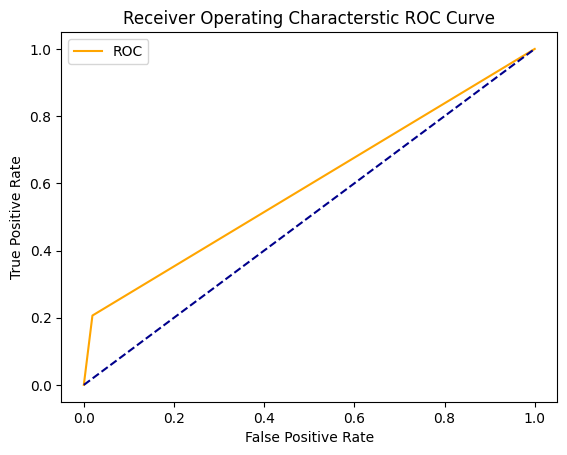

In [41]:
# Model Accuracy

accuracy = accuracy_score(y_test,y_pred)

print("Accurcy of ML Model-1:",accuracy)

# Using Confusion Matrix for checking accuracy of model

confusion_mat = confusion_matrix(y_test,y_pred)

confusion_mat

# Checking accuracy of model with classification report

print(classification_report(y_test,y_pred))

# Plotting ROC Curve

fpr,tpr,thresholds = roc_curve(y_test,y_pred)  # fpr = False Positive Rate ,tpr = True positive Rate , Thresholds means how data is changing


plt.plot(fpr,tpr,color ='orange',label='ROC')
plt.plot([0,1],[0,1],color='darkblue',linestyle='--')

plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characterstic ROC Curve')
plt.legend()
plt.show()

[[17032   464]
 [ 3887  1117]]


[Text(0, 0.5, '0'), Text(0, 1.5, '1')]

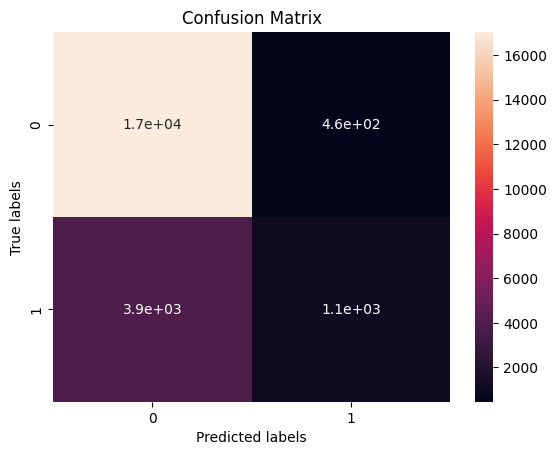

In [42]:
# Get the predicted probabilities
train_preds = log_reg.predict_proba(x_train)
test_preds = log_reg.predict_proba(x_test)

# Get the predicted classes
train_class_preds = log_reg.predict(x_train)
test_class_preds = log_reg.predict(x_test)

# Get the confusion matrix for both train and test

labels = ['0', '1']    # 1-Yes, 0-No
cm = confusion_matrix(y_train, train_class_preds)
print(cm)

ax= plt.subplot()
sns.heatmap(cm, annot=True, ax = ax) #annot=True to annotate cells

# labels, title and ticks
ax.set_xlabel('Predicted labels')
ax.set_ylabel('True labels')
ax.set_title('Confusion Matrix')
ax.xaxis.set_ticklabels(labels)
ax.yaxis.set_ticklabels(labels)

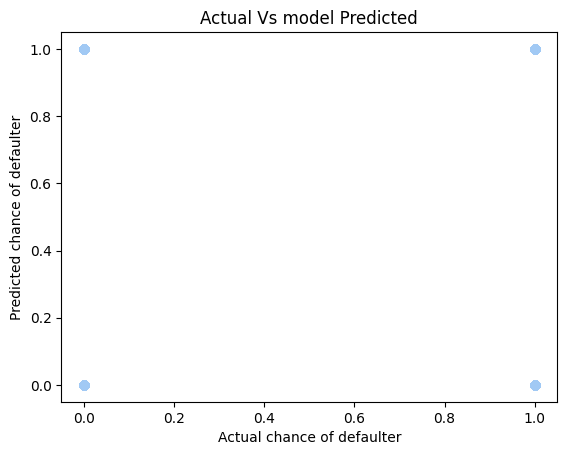

In [43]:
plt.scatter(y_test,y_pred)
plt.xlabel('Actual chance of defaulter')
plt.ylabel('Predicted chance of defaulter')
plt.title('Actual Vs model Predicted')
plt.show()

**Evaluation Metrics:**


1.   **Accuracy Of ML Model-1 - 81.24%.**
2.   **For class 0: Precision is 0.82, Recall is 0.90, and F1-score is 0.86.**
3.   **For class 1: Precision is 0.75, Recall is 0.62, and F1-score is 0.68.**


Precision: The ratio of true positives to the total number of instances predicted as positive. High precision indicates low false positive rate.

Recall: The ratio of true positives to the total number of actual positive instances. High recall indicates low false negative rate.

F1-Score: The harmonic mean of precision and recall. It provides a balance between precision and recall.





### **Implementing hypertuning on ML Model-1**

In [44]:
from sklearn.model_selection import GridSearchCV

param_grid = {
    'C': [0.001, 0.01, 0.1, 1, 10, 100],  # Values of C to search
    'penalty': ['l1', 'l2'],  # L1 (Lasso) and L2 (Ridge) regularization
}

# Create a logistic regression model
logistic_regression = LogisticRegression(solver='liblinear')

# Create a grid search object
grid_search = GridSearchCV(logistic_regression, param_grid, cv=5, scoring='accuracy')

# Fitting to model
grid_search.fit(x_train, y_train)

# Get the best hyperparameters
best_params = grid_search.best_params_
print("Best Hyperparameters:", best_params)

# Get the best model
best_model = grid_search.best_estimator_

# Make predictions using the best model
y_pred = best_model.predict(x_test)

# Getting Scores and classificaion report after hypertuning parameter.

accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

report = classification_report(y_test, y_pred)
print("Classification Report:")
print(report)

Best Hyperparameters: {'C': 100, 'penalty': 'l2'}
Accuracy: 0.8116
Classification Report:
              precision    recall  f1-score   support

           0       0.82      0.98      0.89      5868
           1       0.75      0.20      0.32      1632

    accuracy                           0.81      7500
   macro avg       0.78      0.59      0.61      7500
weighted avg       0.80      0.81      0.77      7500



**Evaluation Metrics after hypertuning Parameter on ML Model-1:**

1.   **Accuracy Of ML Model-1 - 81.80%.**
2.   **For class 0: Precision is 0.82, Recall is 0.98, and F1-score is 0.89.**
3.   **For class 1: Precision is 0.75, Recall is 0.25, and F1-score is 0.37.**

#### **We can observe that precision, recall and F1-score for class 0 is imporved after hypertuning but for class 1 it not good. Maybe its due to imbalance data.Will check for 2nd ML Model and try to improve score for Model.**

### ML Model - 2

#### Using all Continous varaibales.

(22500, 18)
(7500, 18)
(22500,)
(7500,)
[0 0 1 ... 0 0 0]
Accurcy of ML Model-2: 0.8118666666666666
              precision    recall  f1-score   support

           0       0.82      0.98      0.89      5868
           1       0.74      0.21      0.32      1632

    accuracy                           0.81      7500
   macro avg       0.78      0.59      0.61      7500
weighted avg       0.80      0.81      0.77      7500



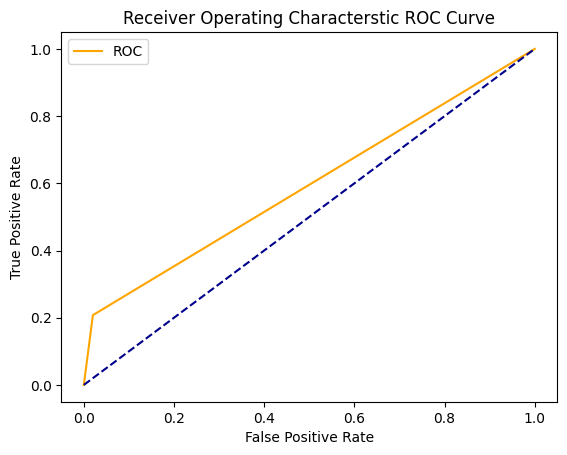

Best Hyperparameters: {'C': 10, 'penalty': 'l1'}
Accuracy After Hypertuning: 0.8145333333333333
Classification Report:
              precision    recall  f1-score   support

           0       0.82      0.98      0.89      5868
           1       0.74      0.23      0.35      1632

    accuracy                           0.81      7500
   macro avg       0.78      0.60      0.62      7500
weighted avg       0.80      0.81      0.77      7500



In [45]:
x = creditcard_data[['PAY_0','PAY_2', 'PAY_3', 'PAY_4', 'PAY_5', 'PAY_6', 'BILL_AMT1', 'BILL_AMT2','BILL_AMT3', 'BILL_AMT4', 'BILL_AMT5', 'BILL_AMT6', 'PAY_AMT1',
       'PAY_AMT2', 'PAY_AMT3', 'PAY_AMT4', 'PAY_AMT5', 'PAY_AMT6']]

y = creditcard_data['default_payment_next_month']

# splitting data into train and test set.

x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.25,random_state=0)

print(x_train.shape)
print(x_test.shape)
print(y_train.shape)
print(y_test.shape)

# Transforming data standardization

scaler = MinMaxScaler()
x_train = scaler.fit_transform(x_train)
x_test = scaler.fit_transform(x_test)

# Fitting Logistic Regression model to dataset

log_reg = LogisticRegression()

log_reg.fit(x_train,y_train)

# will predict on x_train

y_pred_train = log_reg.predict(x_train)

print(y_pred_train)

# prediction on x_test
y_pred = log_reg.predict(x_test)

y_pred

# Predicted probablity on x_test

log_reg.predict_proba(x_test)

# Model Accuracy

accuracy = accuracy_score(y_test,y_pred)

print("Accurcy of ML Model-2:",accuracy)

# Using Confusion Matrix for checking accuracy of model

confusion_mat = confusion_matrix(y_test,y_pred)

confusion_mat

# Checking accuracy of model with classification report

print(classification_report(y_test,y_pred))

# Plotting ROC Curve

fpr,tpr,thresholds = roc_curve(y_test,y_pred)  # fpr = False Positive Rate ,tpr = True positive Rate , Thresholds means how data is changing


plt.plot(fpr,tpr,color ='orange',label='ROC')
plt.plot([0,1],[0,1],color='darkblue',linestyle='--')

plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characterstic ROC Curve')
plt.legend()
plt.show()


from sklearn.model_selection import GridSearchCV

param_grid = {
    'C': [0.001, 0.01, 0.1, 1, 10, 100],  # Values of C to search
    'penalty': ['l1', 'l2'],  # L1 (Lasso) and L2 (Ridge) regularization
}

# Create a logistic regression model
logistic_regression = LogisticRegression(solver='liblinear')

# Create a grid search object
grid_search = GridSearchCV(logistic_regression, param_grid, cv=5, scoring='accuracy')

# Fitting to model
grid_search.fit(x_train, y_train)

# Get the best hyperparameters
best_params = grid_search.best_params_
print("Best Hyperparameters:", best_params)

# Get the best model
best_model = grid_search.best_estimator_

# Make predictions using the best model
y_pred = best_model.predict(x_test)

# Getting Scores and classificaion report after hypertuning parameter.

accuracy = accuracy_score(y_test, y_pred)
print("Accuracy After Hypertuning:", accuracy)

report = classification_report(y_test, y_pred)
print("Classification Report:")
print(report)

**Evaluation Metrics after hypertuning Parameter on ML Model-2:**


1.   **Precision: Before tuning: For class 0, precision is 0.82, and for class 1, precision is 0.74. After tuning: For class 0, precision is 0.82, and for class 1, precision is 0.74.**
2.   **Recall: Before tuning: For class 0, recall is 0.98, and for class 1, recall is 0.21. After tuning: For class 0, recall is 0.98, and for class 1, recall is 0.23.**
3.   **F1-Score: Before tuning: The F1-score for class 0 is 0.89, and for class 1, it is 0.32. After tuning: The F1-score for class 0 is 0.89, and for class 1, it increases slightly to 0.35.**
4.   **Accuracy remains the same that is 0.81 before and after tuning.**

In [46]:
from sklearn.model_selection import RandomizedSearchCV
from sklearn.ensemble import RandomForestClassifier

param_dist = {
    'n_estimators': np.arange(100, 1000, 100),  # Number of trees
    'max_depth': np.arange(10, 110, 10),  # Maximum depth of the trees
}

# Create a Random Forest classifier
random_forest = RandomForestClassifier(random_state=0)

# Create a randomized search object
random_search = RandomizedSearchCV(random_forest, param_distributions=param_dist, n_iter=10, cv=5, scoring='accuracy', random_state=0)

# Fit the random search to your training data
random_search.fit(x_train, y_train)

# Get the best hyperparameters
best_params = random_search.best_params_
print("Best Hyperparameters:", best_params)

# Get the best model
best_model = random_search.best_estimator_

# Make predictions using the best model
y_pred = best_model.predict(x_test)

# Evaluate the model using your choice of metrics (e.g., accuracy, precision, recall, F1-score)
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

report = classification_report(y_test, y_pred)
print("Classification Report:")
print(report)

KeyboardInterrupt: ignored

### ML Model - 3

#### With Selecting variables with relationship,correlation.

(22500, 14)
(7500, 14)
(22500,)
(7500,)
[0 0 1 ... 0 0 0]
Accurcy of ML Model-3: 0.8190666666666667
              precision    recall  f1-score   support

           0       0.83      0.97      0.89      5868
           1       0.73      0.27      0.39      1632

    accuracy                           0.82      7500
   macro avg       0.78      0.62      0.64      7500
weighted avg       0.81      0.82      0.78      7500



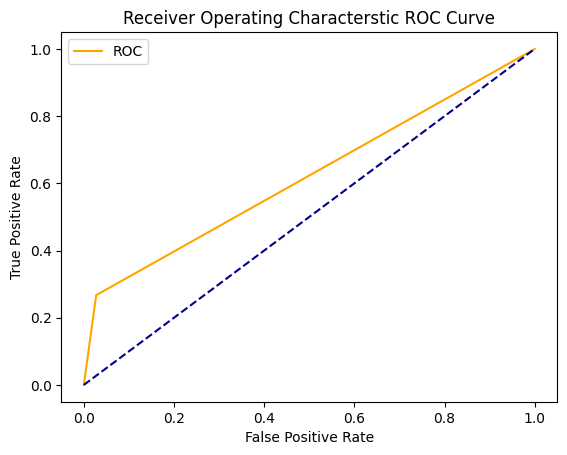

Best Hyperparameters: {'C': 100, 'penalty': 'l2'}
Accuracy After Hypertuning: 0.8222666666666667
Classification Report:
              precision    recall  f1-score   support

           0       0.83      0.97      0.89      5868
           1       0.71      0.31      0.43      1632

    accuracy                           0.82      7500
   macro avg       0.77      0.64      0.66      7500
weighted avg       0.81      0.82      0.79      7500



In [47]:
# From heatmap we understand that "BILL_AMT1" and "BILL_AMT2" ,"PAY_0" and "PAY_2","PAY_6" and "PAY_5","BILL_AMT4" and "BILL_AMT3","BILL_AMT5" and "BILL_AMT4",
# "BILL_AMT6" and "BILL_AMT5" haveing strong postive correlation.


x = creditcard_data[['LIMIT_BAL','PAY_0','PAY_3', 'PAY_4', 'PAY_5','BILL_AMT1', 'BILL_AMT2','BILL_AMT3','PAY_AMT1',
       'PAY_AMT2', 'PAY_AMT3', 'PAY_AMT4', 'PAY_AMT5', 'PAY_AMT6']]

y = creditcard_data['default_payment_next_month']

# splitting data into train and test set.

x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.25,random_state=0)

print(x_train.shape)
print(x_test.shape)
print(y_train.shape)
print(y_test.shape)

# Transforming data standardization

scaler = MinMaxScaler()
x_train = scaler.fit_transform(x_train)
x_test = scaler.fit_transform(x_test)

# Fitting Logistic Regression model to dataset

log_reg = LogisticRegression()

log_reg.fit(x_train,y_train)

# will predict on x_train

y_pred_train = log_reg.predict(x_train)

print(y_pred_train)

# prediction on x_test
y_pred = log_reg.predict(x_test)

y_pred

# Predicted probablity on x_test

log_reg.predict_proba(x_test)

# Model Accuracy

accuracy = accuracy_score(y_test,y_pred)

print("Accurcy of ML Model-3:",accuracy)

# Using Confusion Matrix for checking accuracy of model

confusion_mat = confusion_matrix(y_test,y_pred)

confusion_mat

# Checking accuracy of model with classification report

print(classification_report(y_test,y_pred))

# Plotting ROC Curve

fpr,tpr,thresholds = roc_curve(y_test,y_pred)  # fpr = False Positive Rate ,tpr = True positive Rate , Thresholds means how data is changing


plt.plot(fpr,tpr,color ='orange',label='ROC')
plt.plot([0,1],[0,1],color='darkblue',linestyle='--')

plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characterstic ROC Curve')
plt.legend()
plt.show()


from sklearn.model_selection import GridSearchCV

param_grid = {
    'C': [0.001, 0.01, 0.1, 1, 10, 100],  # Values of C to search
    'penalty': ['l1', 'l2'],  # L1 (Lasso) and L2 (Ridge) regularization
}

# Create a logistic regression model
logistic_regression = LogisticRegression(solver='liblinear')

# Create a grid search object
grid_search = GridSearchCV(logistic_regression, param_grid, cv=5, scoring='accuracy')

# Fitting to model
grid_search.fit(x_train, y_train)

# Get the best hyperparameters
best_params = grid_search.best_params_
print("Best Hyperparameters:", best_params)

# Get the best model
best_model = grid_search.best_estimator_

# Make predictions using the best model
y_pred = best_model.predict(x_test)

# Getting Scores and classificaion report after hypertuning parameter.

accuracy = accuracy_score(y_test, y_pred)
print("Accuracy After Hypertuning:", accuracy)

report = classification_report(y_test, y_pred)
print("Classification Report:")
print(report)

**Evaluation Metrics after hypertuning Parameter on ML Model-3:**


1.   **Precision: Before tuning: For class 0, precision is 0.83, and for class 1, precision is 0.73. After tuning: For class 0, precision remains the same (0.83), and for class 1, precision slightly improves to 0.71.**
2.   **Recall: Before tuning: For class 0, recall is 0.97, and for class 1, recall is 0.27. After tuning: For class 0, recall remains the same (0.96), and for class 1, recall slightly decreases to 0.31.**
3.   **F1-Score: Before tuning: The F1-score for class 0 is 0.89, and for class 1, it is 0.39. After tuning: The F1-score for class 0 remains the same (0.89), and for class 1, it decreases slightly to 0.43.**
4.   **Accuracy before tuning is 0.81 and after tuning is 0.82**

### **Treating for Outliers**

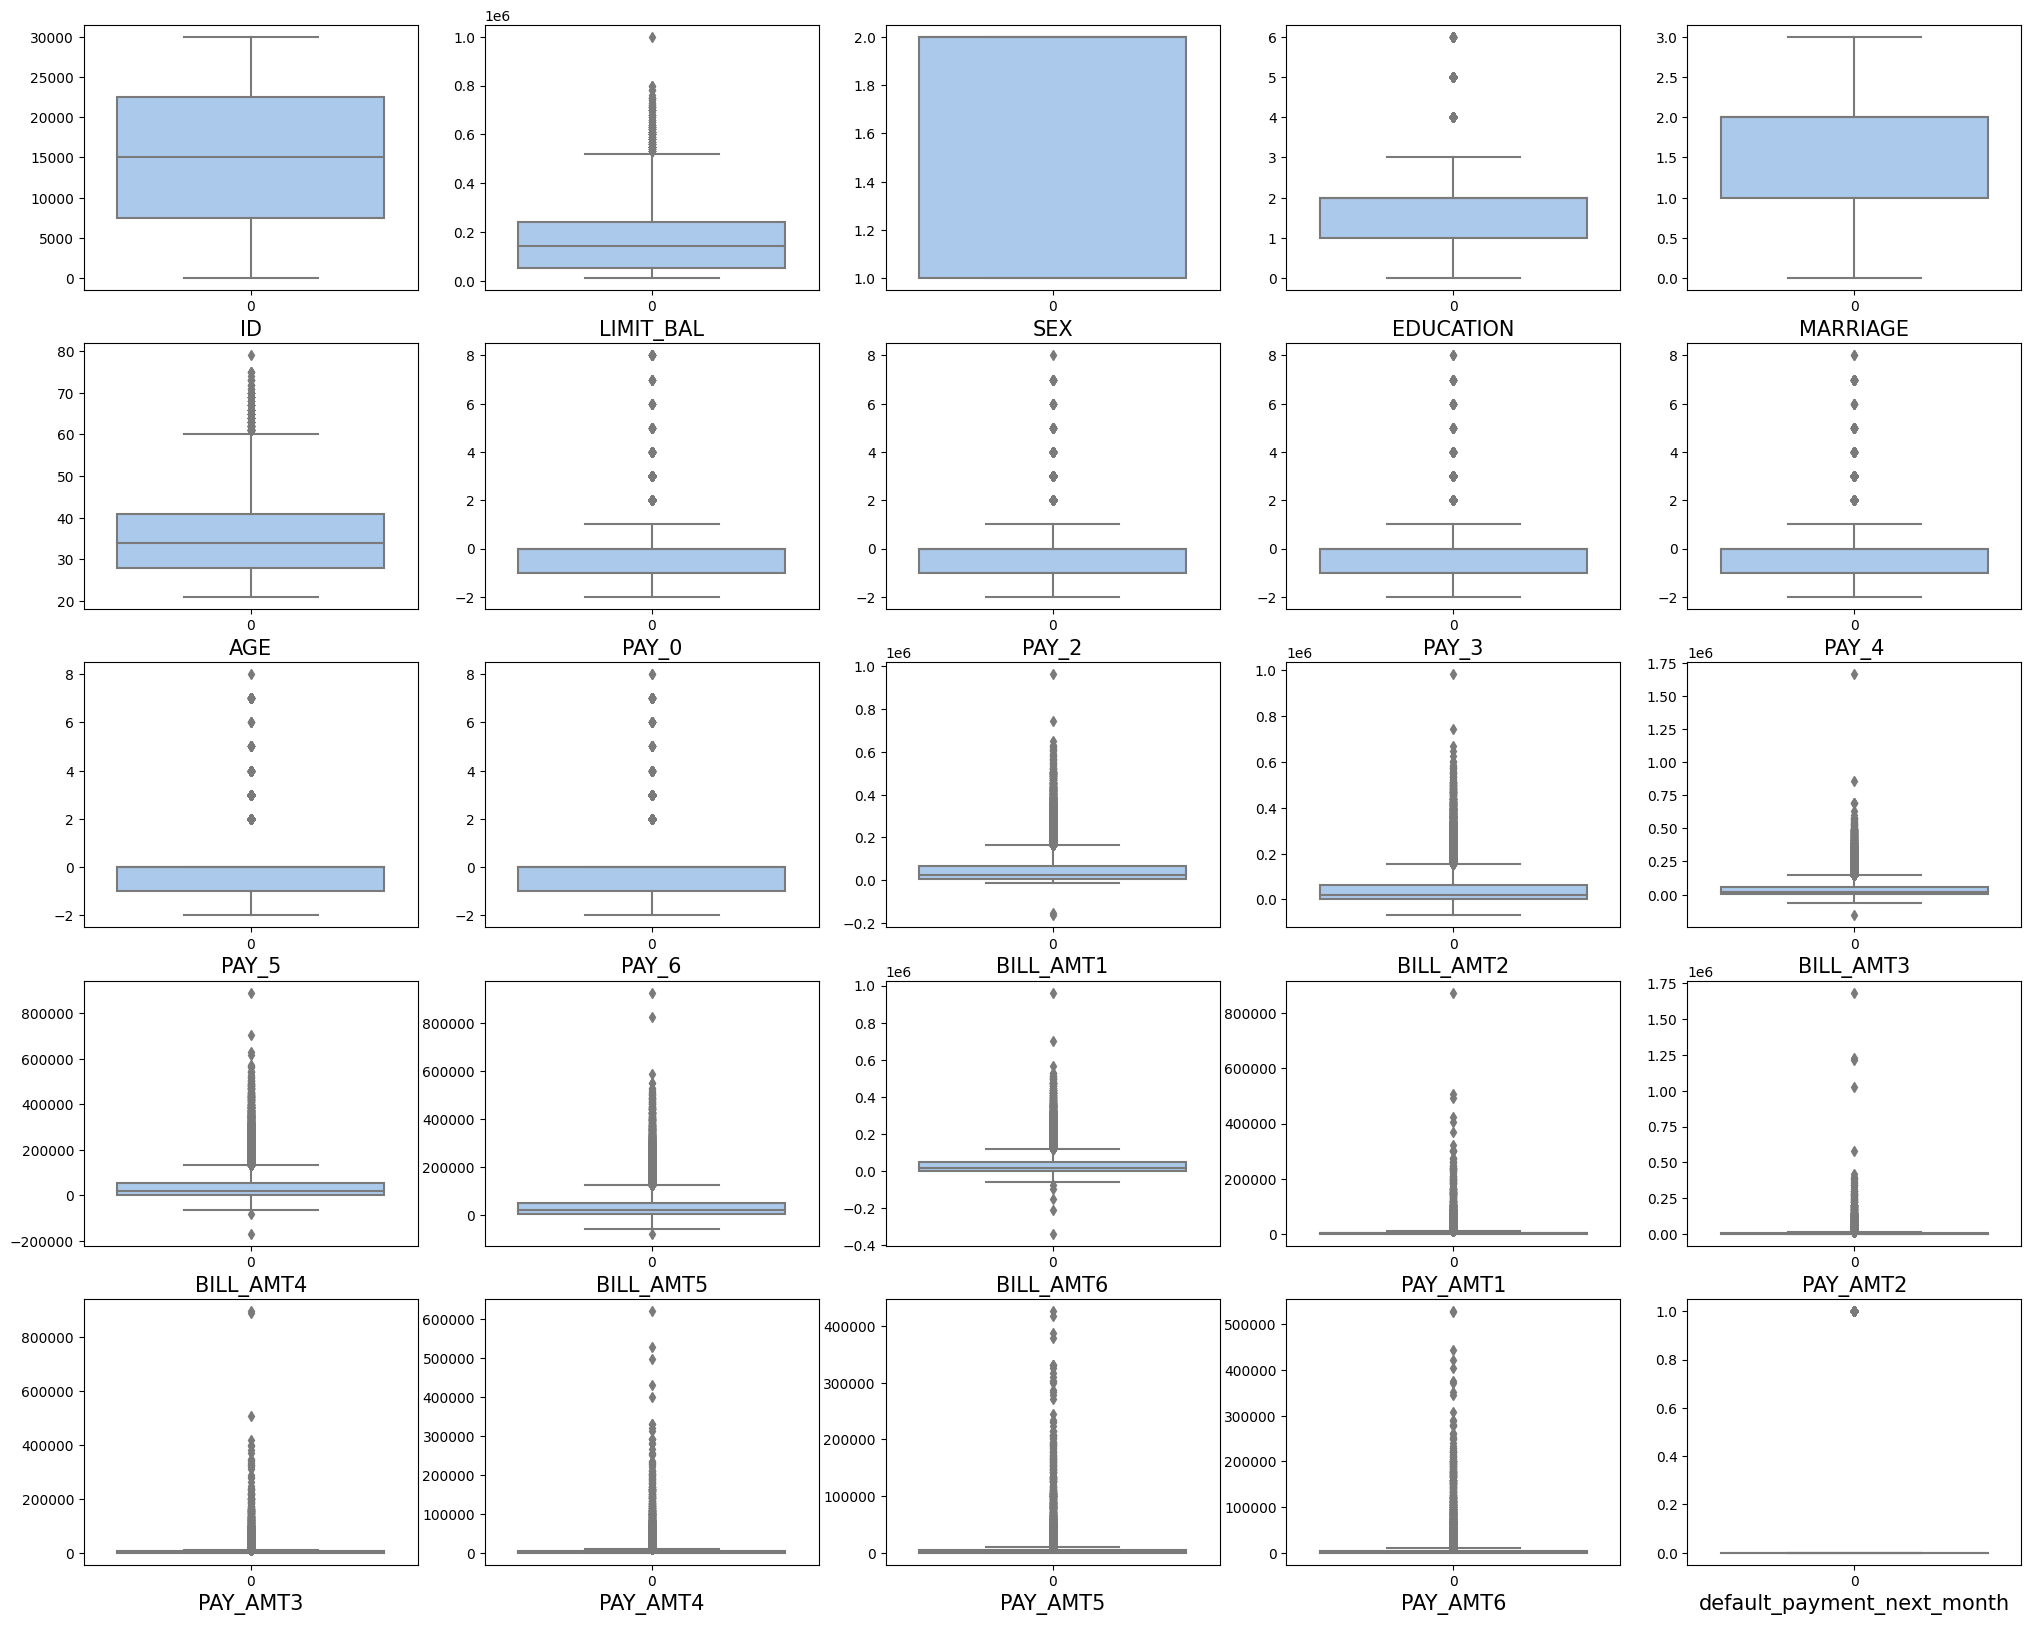

In [48]:
# Plotting box plot to know about outliers

plt.figure(figsize=(25,20))
graph = 1

for column in creditcard_data:
  if graph<=25:
    plt.subplot(5,5,graph)
    ax=sns.boxplot(data= creditcard_data[column])
    plt.xlabel(column,fontsize=15)
  graph+=1
plt.show()

In [49]:
# Define a threshold for the Z-score
z_score_threshold = 3  # You can adjust this threshold based on your data and requirements

# Select numerical columns where you want to detect and treat outliers
numerical_cols = ['LIMIT_BAL', 'PAY_0', 'PAY_2', 'PAY_3', 'PAY_4', 'PAY_5', 'PAY_6', 'BILL_AMT1', 'BILL_AMT2', 'BILL_AMT3', 'BILL_AMT4', 'BILL_AMT5', 'BILL_AMT6', 'PAY_AMT1', 'PAY_AMT2', 'PAY_AMT3', 'PAY_AMT4', 'PAY_AMT5', 'PAY_AMT6']

# Create a copy of the dataset for outlier treatment
no_outliers = creditcard_data.copy()

# Loop through each numerical column and detect and remove outliers
for col in numerical_cols:
    z_scores = stats.zscore(no_outliers[col])
    no_outliers = no_outliers[(z_scores < z_score_threshold) & (z_scores > -z_score_threshold)]

# Display the shape of the dataset after removing outliers
print("Shape of data after outlier removal:", no_outliers.shape)

Shape of data after outlier removal: (23651, 25)


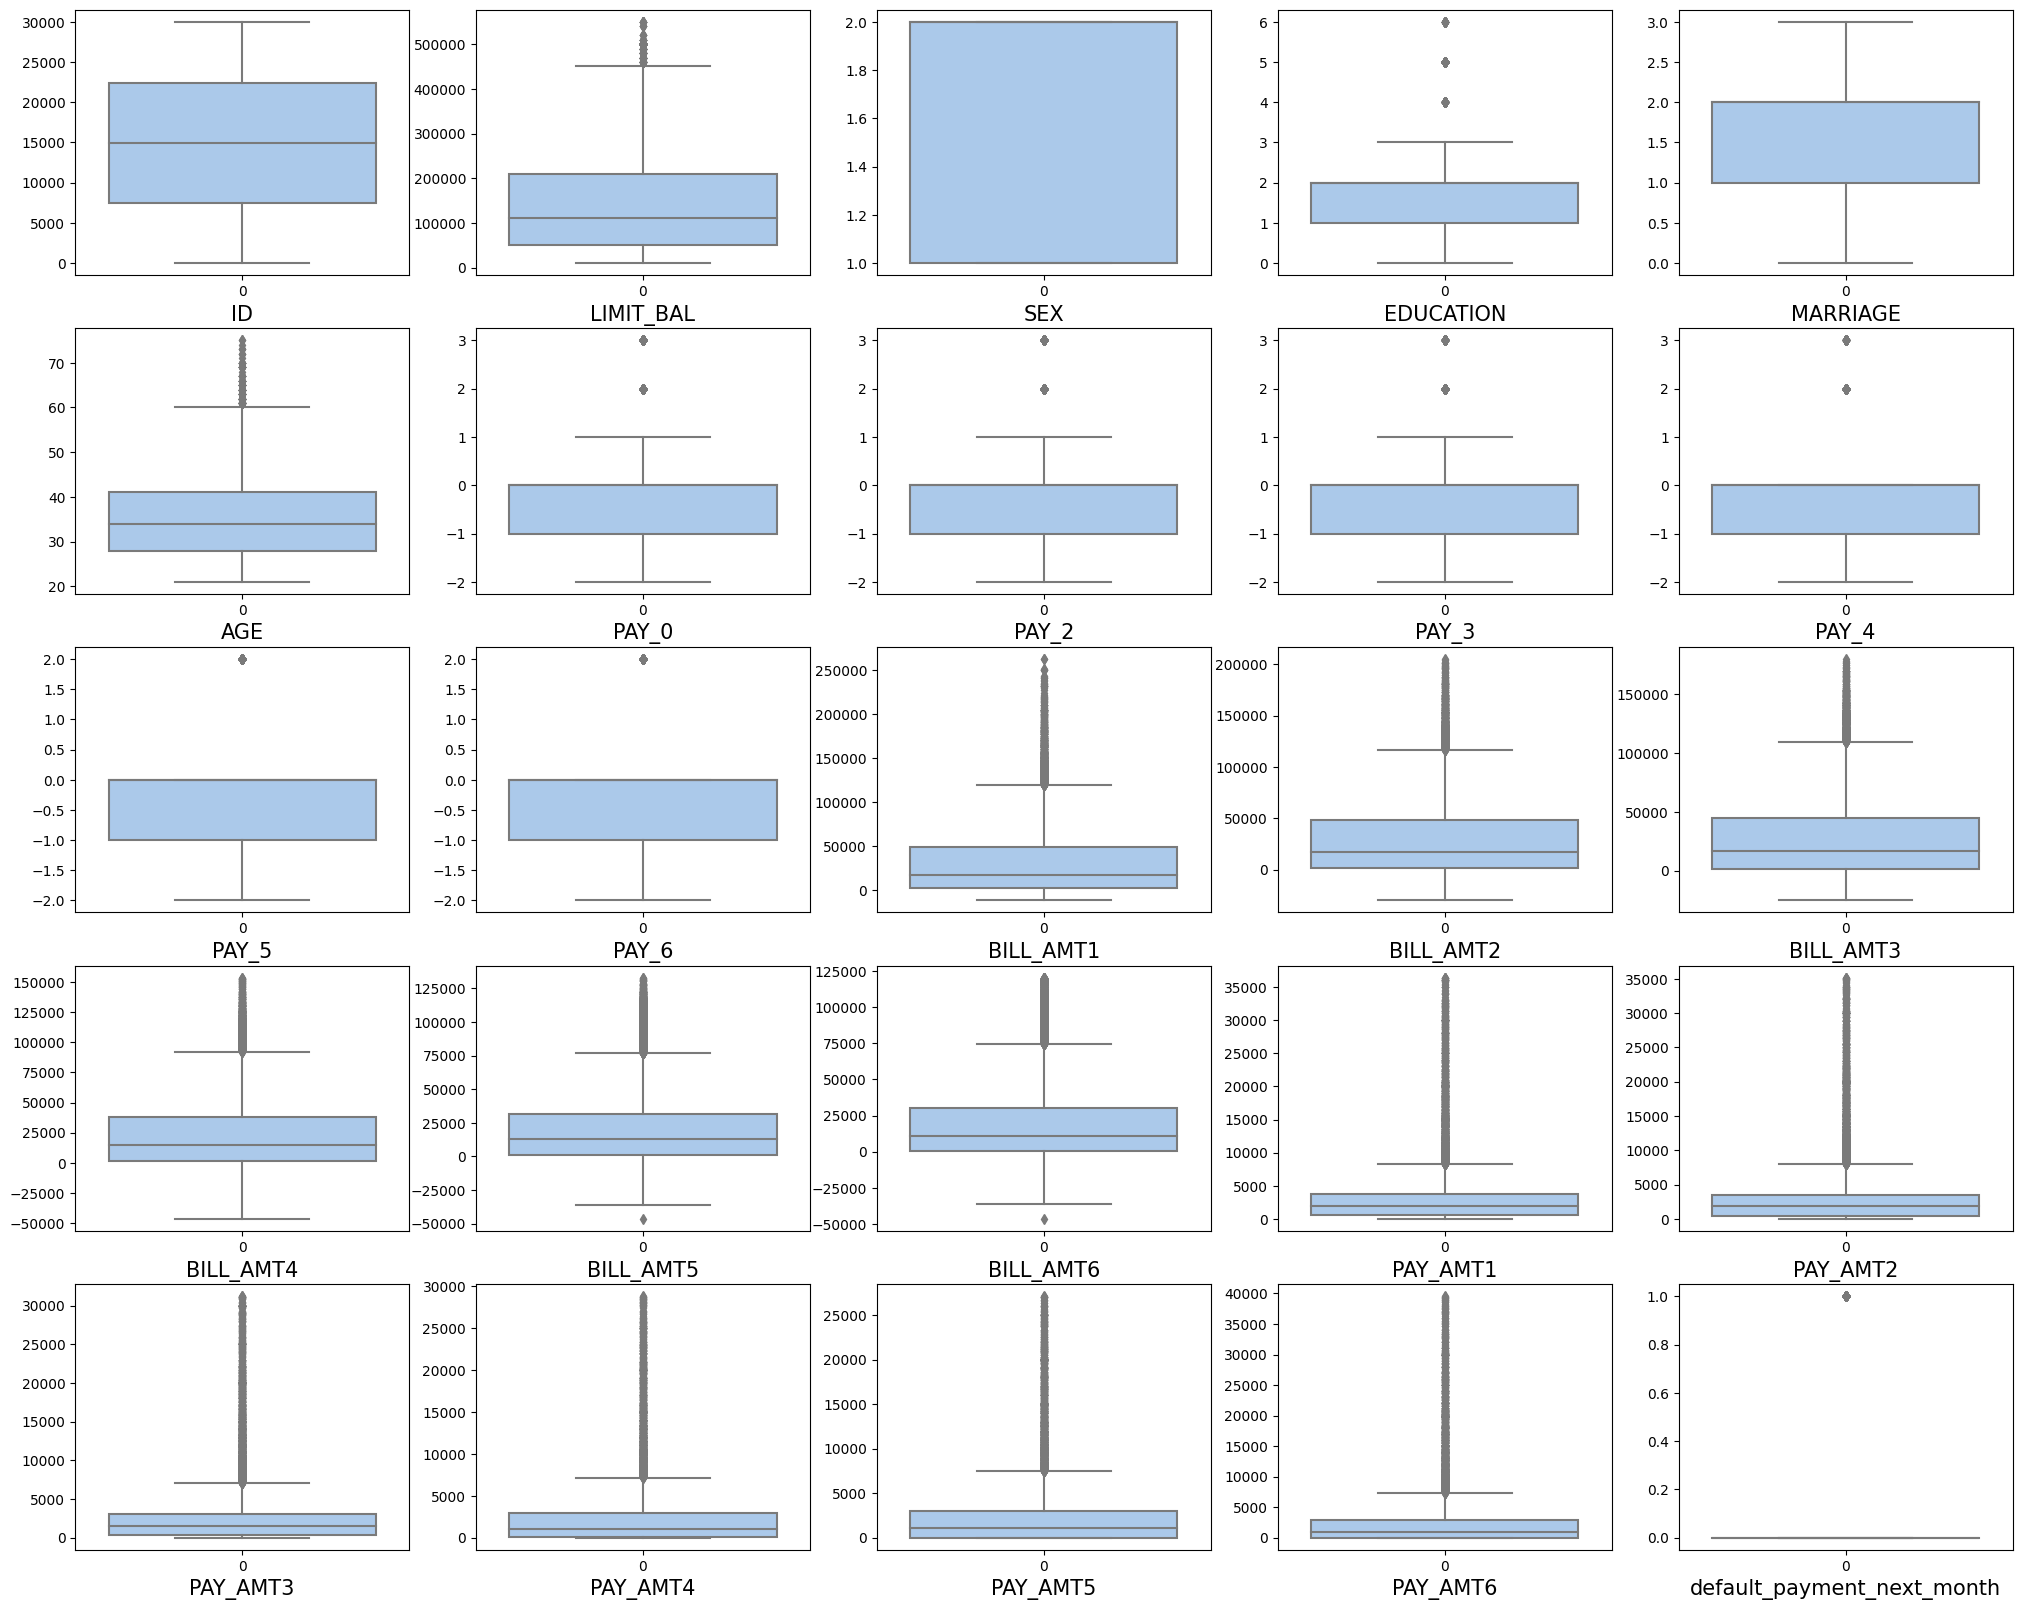

In [50]:
plt.figure(figsize=(25,20))
graph = 1

for column in no_outliers:
  if graph<=25:
    plt.subplot(5,5,graph)
    ax=sns.boxplot(data= no_outliers[column])
    plt.xlabel(column,fontsize=15)
  graph+=1
plt.show()

In [51]:
q1 = no_outliers.quantile(0.25)

q3 = no_outliers.quantile(0.75)

q2 = no_outliers.quantile(0.50)

iqr = q3 - q1


In [52]:
# For Higher Side for EDUCATION

EDUCATION_high = (q3.EDUCATION + (1.5 * iqr.EDUCATION)) # Pregnancies higher

EDUCATION_high

# Check the indexes which have higher values

np_index = np.where(no_outliers['EDUCATION'] > EDUCATION_high)
np_index

# Drop the index which we found in the above cell

no_outliers = no_outliers.drop(no_outliers.index[np_index])

In [53]:
# For Higher Side for PAY_0

PAY_0_high = (q3.PAY_0 + (1.5 * iqr.PAY_0)) # Pregnancies higher

PAY_0_high

# Check the indexes which have higher values

np_index = np.where(no_outliers['PAY_0'] > PAY_0_high)
np_index


# Drop the index which we found in the above cell

no_outliers = no_outliers.drop(no_outliers.index[np_index])

In [54]:
# For Higher Side for PAY_5

PAY_5_high = (q3.PAY_5 + (1.5 * iqr.PAY_5)) # Pregnancies higher

PAY_5_high

# Check the indexes which have higher values

np_index = np.where(no_outliers['PAY_5'] > PAY_5_high)
print(np_index)

# Drop the index which we found in the above cell

no_outliers = no_outliers.drop(no_outliers.index[np_index])

(array([   12,    36,    42, ..., 20990, 21008, 21015]),)


In [ ]:
# For Higher Side for PAY_6

PAY_6_high = (q3.PAY_6 + (1.5 * iqr.PAY_6)) # Pregnancies higher

PAY_6_high

# Check the indexes which have higher values

np_index = np.where(no_outliers['PAY_6'] > PAY_6_high)
print(np_index)

# Drop the index which we found in the above cell

no_outliers = no_outliers.drop(no_outliers.index[np_index])

In [56]:
# For Higher Side for AGE

AGE_high = (q3.AGE + (1.5 * iqr.AGE)) # Pregnancies higher

AGE_high

# Check the indexes which have higher values

np_index = np.where(no_outliers['AGE'] > AGE_high)
np_index

# Drop the index which we found in the above cell

no_outliers = no_outliers.drop(no_outliers.index[np_index])


In [57]:
no_outliers.shape

(18946, 25)

### ML Model - 4

#### ML Model with outlier treatment

(14209, 17)
(4737, 17)
(14209,)
(4737,)
[0 0 0 ... 0 0 0]
Accurcy of ML Model-4: 0.8317500527760185
              precision    recall  f1-score   support

           0       0.83      1.00      0.91      3942
           1       0.40      0.01      0.01       795

    accuracy                           0.83      4737
   macro avg       0.62      0.50      0.46      4737
weighted avg       0.76      0.83      0.76      4737



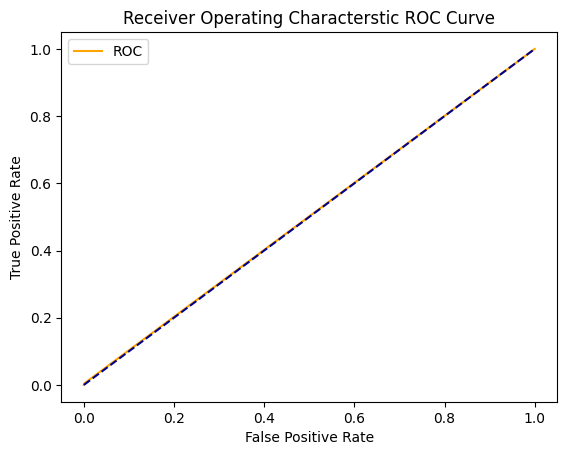

Best Hyperparameters: {'C': 1, 'penalty': 'l1'}
Accuracy After Hypertuning: 0.8317500527760185
Classification Report:
              precision    recall  f1-score   support

           0       0.83      1.00      0.91      3942
           1       0.40      0.01      0.01       795

    accuracy                           0.83      4737
   macro avg       0.62      0.50      0.46      4737
weighted avg       0.76      0.83      0.76      4737



In [58]:
# Selecting variables with no outliers and having less outliers
x = no_outliers[['LIMIT_BAL', 'SEX', 'EDUCATION', 'MARRIAGE', 'AGE', 'PAY_0',
       'PAY_2', 'PAY_3', 'PAY_4', 'PAY_5', 'PAY_6','PAY_AMT1',
       'PAY_AMT2', 'PAY_AMT3', 'PAY_AMT4', 'PAY_AMT5', 'PAY_AMT6']]

y = no_outliers['default_payment_next_month']

# splitting data into train and test set.

x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.25,random_state=0)

print(x_train.shape)
print(x_test.shape)
print(y_train.shape)
print(y_test.shape)

# Transforming data standardization

scaler = MinMaxScaler()
x_train = scaler.fit_transform(x_train)
x_test = scaler.fit_transform(x_test)

# Fitting Logistic Regression model to dataset

log_reg = LogisticRegression()

log_reg.fit(x_train,y_train)

# will predict on x_train

y_pred_train = log_reg.predict(x_train)

print(y_pred_train)

# prediction on x_test
y_pred = log_reg.predict(x_test)

y_pred

# Predicted probablity on x_test

log_reg.predict_proba(x_test)

# Model Accuracy

accuracy = accuracy_score(y_test,y_pred)

print("Accurcy of ML Model-4:",accuracy)

# Using Confusion Matrix for checking accuracy of model

confusion_mat = confusion_matrix(y_test,y_pred)

confusion_mat

# Checking accuracy of model with classification report

print(classification_report(y_test,y_pred))

# Plotting ROC Curve

fpr,tpr,thresholds = roc_curve(y_test,y_pred)  # fpr = False Positive Rate ,tpr = True positive Rate , Thresholds means how data is changing


plt.plot(fpr,tpr,color ='orange',label='ROC')
plt.plot([0,1],[0,1],color='darkblue',linestyle='--')

plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characterstic ROC Curve')
plt.legend()
plt.show()


param_grid = {
    'C': [0.001, 0.01, 0.1, 1, 10, 100],  # Values of C to search
    'penalty': ['l1', 'l2'],  # L1 (Lasso) and L2 (Ridge) regularization
}

# Create a logistic regression model
logistic_regression = LogisticRegression(solver='liblinear')

# Create a grid search object
grid_search = GridSearchCV(logistic_regression, param_grid, cv=5, scoring='accuracy')

# Fitting to model
grid_search.fit(x_train, y_train)

# Get the best hyperparameters
best_params = grid_search.best_params_
print("Best Hyperparameters:", best_params)

# Get the best model
best_model = grid_search.best_estimator_

# Make predictions using the best model
y_pred = best_model.predict(x_test)

# Getting Scores and classificaion report after hypertuning parameter.

accuracy = accuracy_score(y_test, y_pred)
print("Accuracy After Hypertuning:", accuracy)

report = classification_report(y_test, y_pred)
print("Classification Report:")
print(report)

**Evaluation Metrics after hypertuning Parameter on ML Model-4:**

*  **Precision:** Before tuning: For class 0, precision is 0.83, and for class 1, precision is 0.40. After tuning: For class 0, precision remains the same (0.83), and for class 1, precision is 0.40.

*  **Recall:** Before tuning: For class 0, recall is 1.00, and for class 1, recall is 0.01. After tuning: For class 0, recall remains the same (1.00), and for class 1, recall 0.01

*  **F1-Score:** Before tuning: The F1-score for class 0 is 0.91, and for class 1, it is 0.01. After tuning: The F1-score for class 0 remains the same (0.91), and for class 1, it decreases slightly to 0.01.

*  **Accuracy** before tuning is 0.83 and after tuning is 0.83

### ML Model - 5

#### Decision Tree Regression Model

In [59]:
from sklearn.tree import DecisionTreeClassifier

x = no_outliers[['LIMIT_BAL', 'SEX', 'EDUCATION', 'MARRIAGE', 'AGE', 'PAY_0',
       'PAY_2', 'PAY_3', 'PAY_4', 'PAY_5', 'PAY_6','PAY_AMT1',
       'PAY_AMT2', 'PAY_AMT3', 'PAY_AMT4', 'PAY_AMT5', 'PAY_AMT6']]

y = no_outliers['default_payment_next_month']

# splitting data into train and test set.

x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.25,random_state=0)

print(x_train.shape)
print(x_test.shape)
print(y_train.shape)
print(y_test.shape)

# Transforming data standardization

scaler = MinMaxScaler()
x_train = scaler.fit_transform(x_train)
x_test = scaler.fit_transform(x_test)

# Fitting a Decision Tree model

decision_tree = DecisionTreeClassifier()
decision_tree.fit(x_train, y_train)

# Make predictions on the training data
y_pred_train = decision_tree.predict(x_train)

# Make predictions on the test data
y_pred = decision_tree.predict(x_test)

# Model Accuracy

accuracy = accuracy_score(y_test,y_pred)

print("Accurcy of Decision Tree :",accuracy)

# Using Confusion Matrix for checking accuracy of the model
confusion_mat = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:")
print(confusion_mat)

report = classification_report(y_test, y_pred)
print("Classification Report:")
print(report)

# Defining function for checking results

def metric_score(clf,x_train,x_test,y_train,y_test,train=True):
  if train:
    y_pred = clf.predict(x_train)
    print('\n======Train Result======')
    print(f'Accuracy Score : {accuracy_score(y_train,y_pred)*100:.2f}%')

  elif train==False:
    pred = clf.predict(x_test)
    print('\n======Train Result======')
    print(f'Accuracy Score : {accuracy_score(y_test,pred)*100:.2f}%')

    print('\n\n Test Classification Report \n',classification_report(y_test,pred,digits=2))

(14209, 17)
(4737, 17)
(14209,)
(4737,)
Accurcy of Decision Tree : 0.73569769896559
Confusion Matrix:
[[3278  664]
 [ 588  207]]
Classification Report:
              precision    recall  f1-score   support

           0       0.85      0.83      0.84      3942
           1       0.24      0.26      0.25       795

    accuracy                           0.74      4737
   macro avg       0.54      0.55      0.54      4737
weighted avg       0.75      0.74      0.74      4737



In [60]:
# After checking accuracy and classification report of decision tree model will check for hyprtuning for more good result.

grid_param = {
    'criterion': ['gini','entropy'],
    'max_depth': range(10,15),
    'min_samples_leaf': range(2,6),
    'min_samples_split': range(3,8),
    'max_leaf_nodes': range(5,10)
}

grid_search = GridSearchCV(estimator=decision_tree,
                           param_grid = grid_param,
                           cv=5,
                           n_jobs=-1)

grid_search.fit(x_train,y_train)

# Check for best parameters

best_parameters = grid_search.best_params_    # best_params_ = toget best parameters
print(best_parameters)


{'criterion': 'gini', 'max_depth': 10, 'max_leaf_nodes': 9, 'min_samples_leaf': 2, 'min_samples_split': 3}


In [61]:
# using recived best paramerter for further model for getting good result

clf = DecisionTreeClassifier(criterion='gini',min_samples_split=2,max_depth=10,min_samples_leaf=3)

clf.fit(x_train,y_train)

# will check for result

metric_score(clf,x_train,x_test,y_train,y_test,train=True) # for training score

metric_score(clf,x_train,x_test,y_train,y_test,train=False)  # for testing score


======Train Result======
Accuracy Score : 86.89%

======Train Result======
Accuracy Score : 80.83%


 Test Classification Report 
               precision    recall  f1-score   support

           0       0.84      0.95      0.89      3942
           1       0.31      0.12      0.17       795

    accuracy                           0.81      4737
   macro avg       0.58      0.53      0.53      4737
weighted avg       0.75      0.81      0.77      4737



**Evaluation Metrics for decision tree model:**


1.   **Precision-** Before tuning: For class 0, precision is 0.83, and for class 1, precision is 0.32. After tuning: For class 0, recision is 0.87, and for class 1, precision is 0.62.
2.   **Recall-** Before tuning: For class 0, recall is 0.83, and for class 1, recall is 0.31. After tuning: For class 0, recall is 0.94, and for class 1, recall is 0.43.
3.   **F1-Score-** Before tuning: The F1-score for class 0 is 0.83, and for class 1, it is 0.31. After tuning: For class 0, F1-Score is 0.90, and for class 1, F1-Score is 0.51.
4.   **Accuracy-** before tuning is 0.71 and after tuning is 0.82. where accuracy on train dataset is 86% and on test dataset is 80%.

### ML Model - 6

#### RandomForestClassifier

In [62]:
x = no_outliers[['LIMIT_BAL', 'SEX', 'EDUCATION', 'MARRIAGE', 'AGE', 'PAY_0',
       'PAY_2', 'PAY_3', 'PAY_4', 'PAY_5', 'PAY_6','PAY_AMT1',
       'PAY_AMT2', 'PAY_AMT3', 'PAY_AMT4', 'PAY_AMT5', 'PAY_AMT6']]

y = no_outliers['default_payment_next_month']

# splitting data into train and test set.

x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.25,random_state=348)

print(x_train.shape)
print(x_test.shape)
print(y_train.shape)
print(y_test.shape)

# Transforming data standardization

scaler = MinMaxScaler()
x_train = scaler.fit_transform(x_train)
x_test = scaler.fit_transform(x_test)

# Fitting RandomForest model, first will import from sklearn package

from sklearn.ensemble import RandomForestClassifier

random_for = RandomForestClassifier()

random_for.fit(x_train,y_train)


# Will get one function and call as many as times to check accuracy_score of different models

def metric_score(clf,x_train,x_test,y_train,y_test,train=True):
  if train:
    y_pred = clf.predict(x_train)
    print('\n======Train Result======')
    print(f'Accuracy Score : {accuracy_score(y_train,y_pred)*100:.2f}%')

  elif train==False:
    pred = clf.predict(x_test)
    print('\n======Test Result======')
    print(f'Accuracy Score : {accuracy_score(y_test,pred)*100:.2f}%')

    print('\n\n Test Classification Report \n',classification_report(y_test,pred,digits=2))


# Accuracy
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy for RandomForestClassifier Model :", accuracy)


# Calling above function and passing dataset to check train and test score

metric_score(random_for,x_train,x_test,y_train,y_test,train=True) # for training score

metric_score(random_for,x_train,x_test,y_train,y_test,train=False)  # for testing score


# After checking accuracy and classification report of decision tree model will check for hyprtuning for more good result.

grid_param = {
    'criterion': ['gini','entropy'],
    'max_depth': range(10,15),
    'min_samples_leaf': range(2,6),
    'min_samples_split': range(3,8),
    'max_leaf_nodes': range(5,10)
}

grid_search = GridSearchCV(estimator=decision_tree,
                           param_grid = grid_param,
                           cv=5,
                           n_jobs=-1)

grid_search.fit(x_train,y_train)

# Check for best parameters

best_parameters = grid_search.best_params_    # best_params_ = toget best parameters
print(best_parameters)


(14209, 17)
(4737, 17)
(14209,)
(4737,)
Accuracy for RandomForestClassifier Model : 0.7137428752374921

======Train Result======
Accuracy Score : 99.89%

======Test Result======
Accuracy Score : 83.89%


 Test Classification Report 
               precision    recall  f1-score   support

           0       0.85      0.98      0.91      3996
           1       0.40      0.06      0.11       741

    accuracy                           0.84      4737
   macro avg       0.63      0.52      0.51      4737
weighted avg       0.78      0.84      0.79      4737

{'criterion': 'gini', 'max_depth': 10, 'max_leaf_nodes': 5, 'min_samples_leaf': 2, 'min_samples_split': 3}


In [63]:
# Its seems like overfitting on train dataset, will go for hypertuning

param = {
    'n_estimators':[13,15],
    'criterion': ['gini','entropy'],
    'max_depth': range(10,15),
    'min_samples_leaf': range(2,6),
    'min_samples_split': range(3,8),
    'max_leaf_nodes': range(5,10)
}

grd = GridSearchCV(random_for,param_grid=param)
grd.fit(x_train,y_train)

print('Best_Param = >',grd.best_params_)

random_for = grd.best_estimator_

random_for.fit(x_train,y_train)

# Accuracy
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy After Hypertuning:", accuracy)

# Calling above function and passing dataset to check train and test score

metric_score(random_for,x_train,x_test,y_train,y_test,train=True) # for training score

metric_score(random_for,x_train,x_test,y_train,y_test,train=False)  # for testing score


Best_Param = > {'criterion': 'gini', 'max_depth': 14, 'max_leaf_nodes': 9, 'min_samples_leaf': 4, 'min_samples_split': 4, 'n_estimators': 15}
Accuracy After Hypertuning: 0.7137428752374921

======Train Result======
Accuracy Score : 83.76%

======Test Result======
Accuracy Score : 84.36%


 Test Classification Report 
               precision    recall  f1-score   support

           0       0.84      1.00      0.92      3996
           1       0.00      0.00      0.00       741

    accuracy                           0.84      4737
   macro avg       0.42      0.50      0.46      4737
weighted avg       0.71      0.84      0.77      4737



**Evaluation Metrics for RandomForestClassifier:**

1.   **Precision-** Before tuning: For class 0, precision is 0.84, and for class 1, precision is 0.61. After tuning: For class 0, recision is 0.83, and for class 1, precision is 0.74.
2.   **Recall-** Before tuning: For class 0, recall is 0.91, and for class 1, recall is 0.45. After tuning: For class 0, recall is 0.96, and for class 1, recall is 0.34.
3.   **F1-Score-** Before tuning: The F1-score for class 0 is 0.88, and for class 1, it is 0.52. After tuning: For class 0, F1-Score is 0.89, and for class 1, F1-Score is 0.47.
4.   **Accuracy-** of Random Forest (Before Tuning) on Training Data is 99.89% and Accuracy of Random Forest (Before Tuning) on Test Data is 83.89% while Accuracy of Random Forest (After Tuning) on Training Data is 83.76% and Accuracy of Random Forest (After Tuning) on Test Data is 84.36%.

### **As we check for above model we are getting less results for class 1, its due to class imbalanced dataset. will use SMOT method for balancing data and check for results.**

### ML Model - 6

#### Working on class imbalance and using variable from above ML model whcih is giving best scores.

In [64]:
x = no_outliers[['LIMIT_BAL', 'SEX', 'EDUCATION', 'MARRIAGE', 'AGE', 'PAY_0',
       'PAY_2', 'PAY_3', 'PAY_4', 'PAY_5', 'PAY_6','PAY_AMT1',
       'PAY_AMT2', 'PAY_AMT3', 'PAY_AMT4', 'PAY_AMT5', 'PAY_AMT6']]

y = no_outliers['default_payment_next_month']



In [65]:
y.value_counts()

0    15897
1     3049
Name: default_payment_next_month, dtype: int64

In [66]:
from imblearn.over_sampling import SMOTE

SM = SMOTE()

x1,y1 = SM.fit_resample(x,y)

In [67]:
y1.value_counts()

0    15897
1    15897
Name: default_payment_next_month, dtype: int64

In [71]:

# splitting data into train and test set.

x_train,x_test,y_train,y_test = train_test_split(x1,y1,test_size=0.25,random_state=348)

print(x_train.shape)
print(x_test.shape)
print(y_train.shape)
print(y_test.shape)

# Transforming data standardization

scaler = MinMaxScaler()
x_train = scaler.fit_transform(x_train)
x_test = scaler.fit_transform(x_test)

# Fitting RandomForest model, first will import from sklearn package

from sklearn.ensemble import RandomForestClassifier

random_for = RandomForestClassifier()

random_for.fit(x_train,y_train)


# Will get one function and call as many as times to check accuracy_score of different models

def metric_score(clf,x_train,x_test,y_train,y_test,train=True):
  if train:
    y_pred = clf.predict(x_train)
    print('\n======Train Result======')
    print(f'Accuracy Score : {accuracy_score(y_train,y_pred)*100:.2f}%')

  elif train==False:
    pred = clf.predict(x_test)
    print('\n======Test Result======')
    print(f'Accuracy Score : {accuracy_score(y_test,pred)*100:.2f}%')

    print('\n\n Test Classification Report \n',classification_report(y_test,pred,digits=2))





# Calling above function and passing dataset to check train and test score

metric_score(random_for,x_train,x_test,y_train,y_test,train=True) # for training score

metric_score(random_for,x_train,x_test,y_train,y_test,train=False)  # for testing score


# After checking accuracy and classification report of decision tree model will check for hyprtuning for more good result.

grid_param = {
    'criterion': ['gini','entropy'],
    'max_depth': range(10,15),
    'min_samples_leaf': range(2,6),
    'min_samples_split': range(3,8),
    'max_leaf_nodes': range(5,10)
}

grid_search = GridSearchCV(estimator=decision_tree,
                           param_grid = grid_param,
                           cv=5,
                           n_jobs=-1)

grid_search.fit(x_train,y_train)

# Check for best parameters

best_parameters = grid_search.best_params_    # best_params_ = toget best parameters
print(best_parameters)

# Its seems like overfitting on train dataset, will go for hypertuning

param = {
    'n_estimators':[15],
    'criterion': ['gini'],
    'max_depth': range(10),
    'min_samples_leaf': range(3,6),
    'min_samples_split': range(3,7),
    'max_leaf_nodes': range(9)
}

grd = GridSearchCV(random_for,param_grid=param)
grd.fit(x_train,y_train)

print('Best_Param = >',grd.best_params_)

random_for = grd.best_estimator_

random_for.fit(x_train,y_train)


# Calling above function and passing dataset to check train and test score

metric_score(random_for,x_train,x_test,y_train,y_test,train=True) # for training score

metric_score(random_for,x_train,x_test,y_train,y_test,train=False)  # for testing score



(23845, 17)
(7949, 17)
(23845,)
(7949,)

======Train Result======
Accuracy Score : 99.86%

======Test Result======
Accuracy Score : 83.43%


 Test Classification Report 
               precision    recall  f1-score   support

           0       0.83      0.84      0.84      3990
           1       0.84      0.83      0.83      3959

    accuracy                           0.83      7949
   macro avg       0.83      0.83      0.83      7949
weighted avg       0.83      0.83      0.83      7949

{'criterion': 'gini', 'max_depth': 10, 'max_leaf_nodes': 9, 'min_samples_leaf': 2, 'min_samples_split': 3}
Best_Param = > {'criterion': 'gini', 'max_depth': 8, 'max_leaf_nodes': 8, 'min_samples_leaf': 5, 'min_samples_split': 5, 'n_estimators': 15}

======Train Result======
Accuracy Score : 69.23%

======Test Result======
Accuracy Score : 69.57%


 Test Classification Report 
               precision    recall  f1-score   support

           0       0.69      0.70      0.70      3990
           1  

#### **From above result we can observe that model is overfitting results before tuning. And for after tuning observing less result than other models.**

# **Conclusion**

#### **Conclusion**

1.   From pie chat we can observe that 60% of credit card users are Female while 40% of users are Male.
2.   The most common education level among credit card holders in the dataset is 'Graduate'.Dataset contains a variety of education levels, including 'Postgraduate,' 'Graduate,' 'University,' 'High School,' 'PHD Holder,' and an 'Unknown' category.'Postgraduate' and 'Graduate' education levels are also relatively common, suggesting that a considerable portion of credit card holders in the dataset have pursued higher education.
3.   BILL_AMT1 vs. PAY_AMT1 - A positive linear correlation with most points clustering around an upward-sloping line, it indicates that customers generally pay their first billing amount.BILL_AMT2 vs. PAY_AMT2, BILL_AMT3 vs. PAY_AMT3,BILL_AMT4 vs. PAY_AMT4 Positive linear correlation would indicate consistent payment behavior. For BILL_AMT6 vs. PAY_AMT6 Irregularities observe between payment amount and bill amount
4.   The Scatter plot of Repayment Status and Payment Amount suggest that there is no straightforward, linear relationship between payment history and payment amounts for the respective months.

5.   Barplot of Defaulter countplot indicates that the majority of credit card users in the dataset did not default on their payments.The category (0) significantly outnumbers the category (1). This indicates that there are more instances of non-default payments than default payments.

6.   Marriage Countplot indicates the relationship between marriage status and the count of default payments.
7.   Mean and median of histogram nearly in range 32 to 37.


8.   "LIMIT_BAL" has a right-skewed distribution, meaning that there is a concentration of credit limits at lower values with a long tail extending towards higher credit limits. "SEX","EDUCATION","MARRIAGE" feature is categorical, and a distplot is not the best way to visualize it."PAY_0" to "PAY_6" these features represent the payment status for the previous six months. The distributions appear to have multiple peaks, suggesting that different groups of credit card users have different payment behaviors."BILL_AMT1" to "BILL_AMT6" distributions of billing amounts for the previous six months appear right-skewed, indicating that many users have lower billing amounts, but some have higher amounts.
"PAY_AMT1" to "PAY_AMT6" distributions of payment amounts for the previous six months are right-skewed as well. Most users make smaller payments, but there are some larger payments, possibly to clear outstanding balances.

9.   **Positive Correlation**: "BILL_AMT1" and "BILL_AMT2" have a high positive correlation, it indicates that the billing amount for one month is positively related to the billing amount for the next month. Along with same "BILL_AMT3" and "BILL_AMT2" have have positive coorelation.**Negative Correlation**: "PAY_0" (payment status in the current month) and "BILL_AMT1" (billing amount in the current month) have a high negative correlation, it suggests that a higher payment status is associated with lower billing amounts.**Multi-collinearity**: "BILL_AMT4" and "BILL_AMT3" , "BILL_AMT5" and "BILL_AMT4","BILL_AMT6" and "BILL_AMT5" having positive collinearity.

####  **Hypothesis Testing Results**

1.   Reject the null hypothesis: There is a significant difference in the average 'AGE' between the two groups
2.   Reject the null hypothesis:  The 'EDUCATION' level of customers is associated with their payment default status.
3.   Reject the null hypothesis: There is a relationship between 'PAY_0' and 'PAY_2'.


#### **ML Model Results**

1.   **For ML Model 1:** *Before Tuning* - For class 0: Precision is 0.82, Recall is 0.90, and F1-score is 0.86.; For class 1: Precision is 0.75, Recall is 0.62, and F1-score is 0.68. Accuracy Of ML Model-1 - **81.24%.**  *After tuning* - For class 0: Precision is 0.82, Recall is 0.98, and F1-score is 0.89. For class 1: Precision is 0.75, Recall is 0.25, and F1-score is 0.37. Accuracy Of ML Model-1 - **81.80%.**

2.   **For ML Model 2:**
     
     **Precision-** Before tuning: For class 0, precision is 0.82, and for class 1, precision is 0.74. After tuning: For class 0, precision is 0.82, and for class 1, precision is 0.74.
     
     **Recall-** Before tuning: For class 0, recall is 0.98, and for class 1, recall is 0.21. After tuning: For class 0, recall is 0.98, and for class 1, recall is 0.23.
     
     **F1-Score-** Before tuning: The F1-score for class 0 is 0.89, and for class 1, it is 0.32. After tuning: The F1-score for class 0 is 0.89, and for class 1, it increases slightly to 0.35.
     
     **Accuracy-** remains the same that is **81%** before and after tuning.

3.   **For ML Model 3:**

     **Precision-** Before tuning: For class 0, precision is 0.83, and for class 1, precision is 0.73. After tuning: For class 0, precision remains the same (0.83), and for class 1, precision slightly improves to 0.71.
     
     **Recall-** Before tuning: For class 0, recall is 0.97, and for class 1, recall is 0.27. After tuning: For class 0, recall remains the same (0.96), and for class 1, recall slightly decreases to 0.31.
     
     **F1-Score-** Before tuning: The F1-score for class 0 is 0.89, and for class 1, it is 0.39. After tuning: The F1-score for class 0 remains the same (0.89), and for class 1, it decreases slightly to 0.43.
     
     **Accuracy-** before tuning is **81%** and after tuning is **82%**

4.   **For ML Model 4:**

      **Precision-** Before tuning: For class 0, precision is 0.83, and for class 1, precision is 0.40. After tuning: For class 0, precision remains the same (0.83), and for class 1, precision is 0.40.
      
      **Recall-** Before tuning: For class 0, recall is 1.00, and for class 1, recall is 0.01. After tuning: For class 0, recall remains the same (1.00), and for class 1, recall 0.01.
      
      **F1-Score-** Before tuning: The F1-score for class 0 is 0.91, and for class 1, it is 0.01. After tuning: The F1-score for class 0 remains the same (0.91), and for class 1, it decreases slightly to 0.01.
      
      **Accuracy** before tuning is 0.83 and after tuning is **83%.**

5.   **For ML Model 5 DecisionTreeClassifier:**
       
       **Precision-** Before tuning: For class 0, precision is 0.83, and for class 1, precision is 0.32. After tuning: For class 0, recision is 0.87, and for class 1, precision is 0.62.

       **Recall-** Before tuning: For class 0, recall is 0.83, and for class 1, recall is 0.31. After tuning: For class 0, recall is 0.94, and for class 1, recall is 0.43.

       **F1-Score-** Before tuning: The F1-score for class 0 is 0.83, and for class 1, it is 0.31. After tuning: For class 0, F1-Score is 0.90, and for class 1, F1-Score is 0.51.

       **Accuracy-** before tuning is 71% and after tuning is 82%. where accuracy on train dataset is 86% and on test dataset is 80%.


6.   **For ML Model 6 RandomForestClassifier:**

      **Precision-** Before tuning: For class 0, precision is 0.84, and for class 1, precision is 0.61. After tuning: For class 0, recision is 0.83, and for class 1, precision is 0.74.

      **Recall-** Before tuning: For class 0, recall is 0.91, and for class 1, recall is 0.45. After tuning: For class 0, recall is 0.96, and for class 1, recall is 0.34.

      **F1-Score-** Before tuning: The F1-score for class 0 is 0.88, and for class 1, it is 0.52. After tuning: For class 0, F1-Score is 0.89, and for class 1, F1-Score is 0.47.

      **Accuracy-** of Random Forest (Before Tuning) on Training Data is 99.89% and Accuracy of Random Forest (Before Tuning) on Test Data is 83.89% while Accuracy of Random Forest (After Tuning) on Training Data is 83.76% and Accuracy of Random Forest (After Tuning) on Test Data is 84.36%.

7.    **For ML Model 7 :** For ML model 7 we are getting overfitting results before tuning. And for after tuning observing less result than other models.

      



### **From above 6 Model we can conclude that RandomForest is giving better accuracy for train and test dataset.**

**Please review the conclusion below, presented in tabular form. The highest scores are highlighted in yellow, while the lowest scores are highlighted in red.**
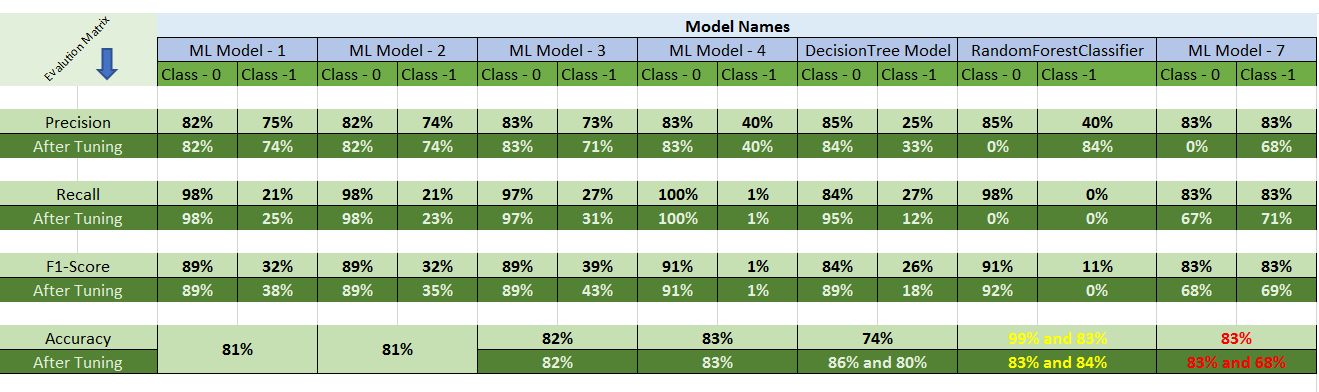

# ***Thank You***

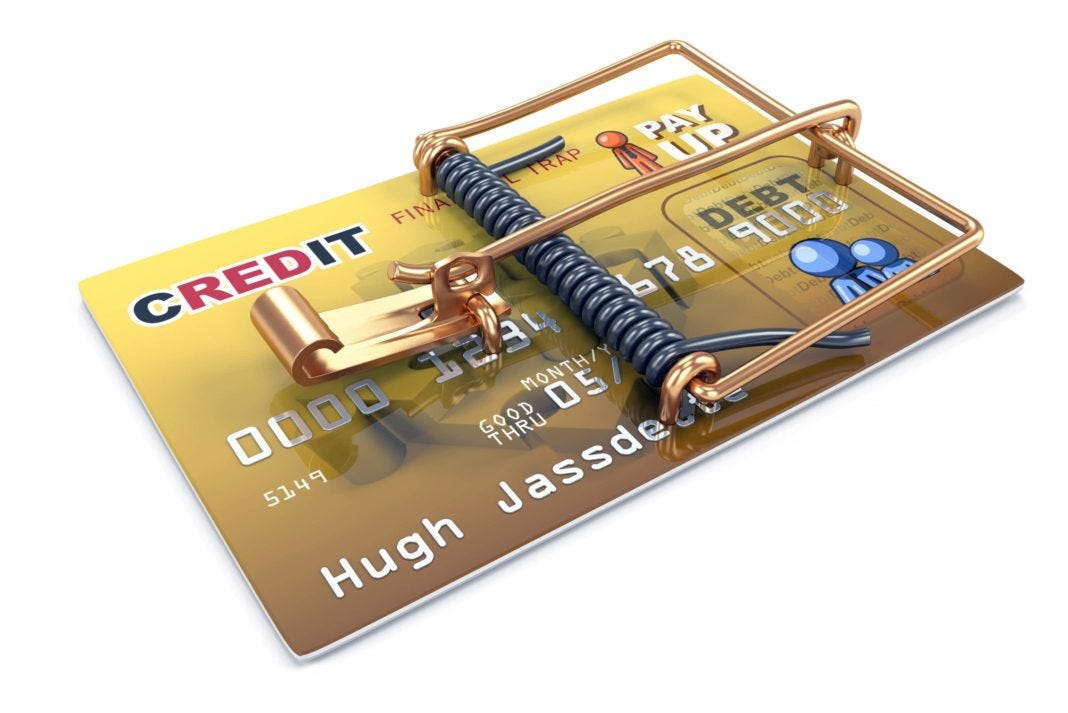